# Prediction of Esport Result

### Predicting Outcomes of Professional League of Legends matches Using Ban/Pick Info and Player IDs

### Background Information

The video games industry has grown rapidly during the past several decades. It has become one of the most significant entertainment for people across all occupations and ages nowadays. Meanwhile, the esports based on popular competetive video games also turned into a prevalent type of sports for people, especially teenagers, to watch.

The game we are discussing here is League of Legends, a Massive Online Battle Arena (MOBA) game designed by Riot Games and released on the PC platform back in 2009. Each game allows five players to compete against other five players on the same map with each player select and control a champion with a unique set of abilities. The goal for each side is to invade and destroy the opposing team's base which is called nexus. The map of each game contains three lanes seperated by jungles with the red nexus located on the top right corner and the blue nexus on the bottem left, as shown below. 

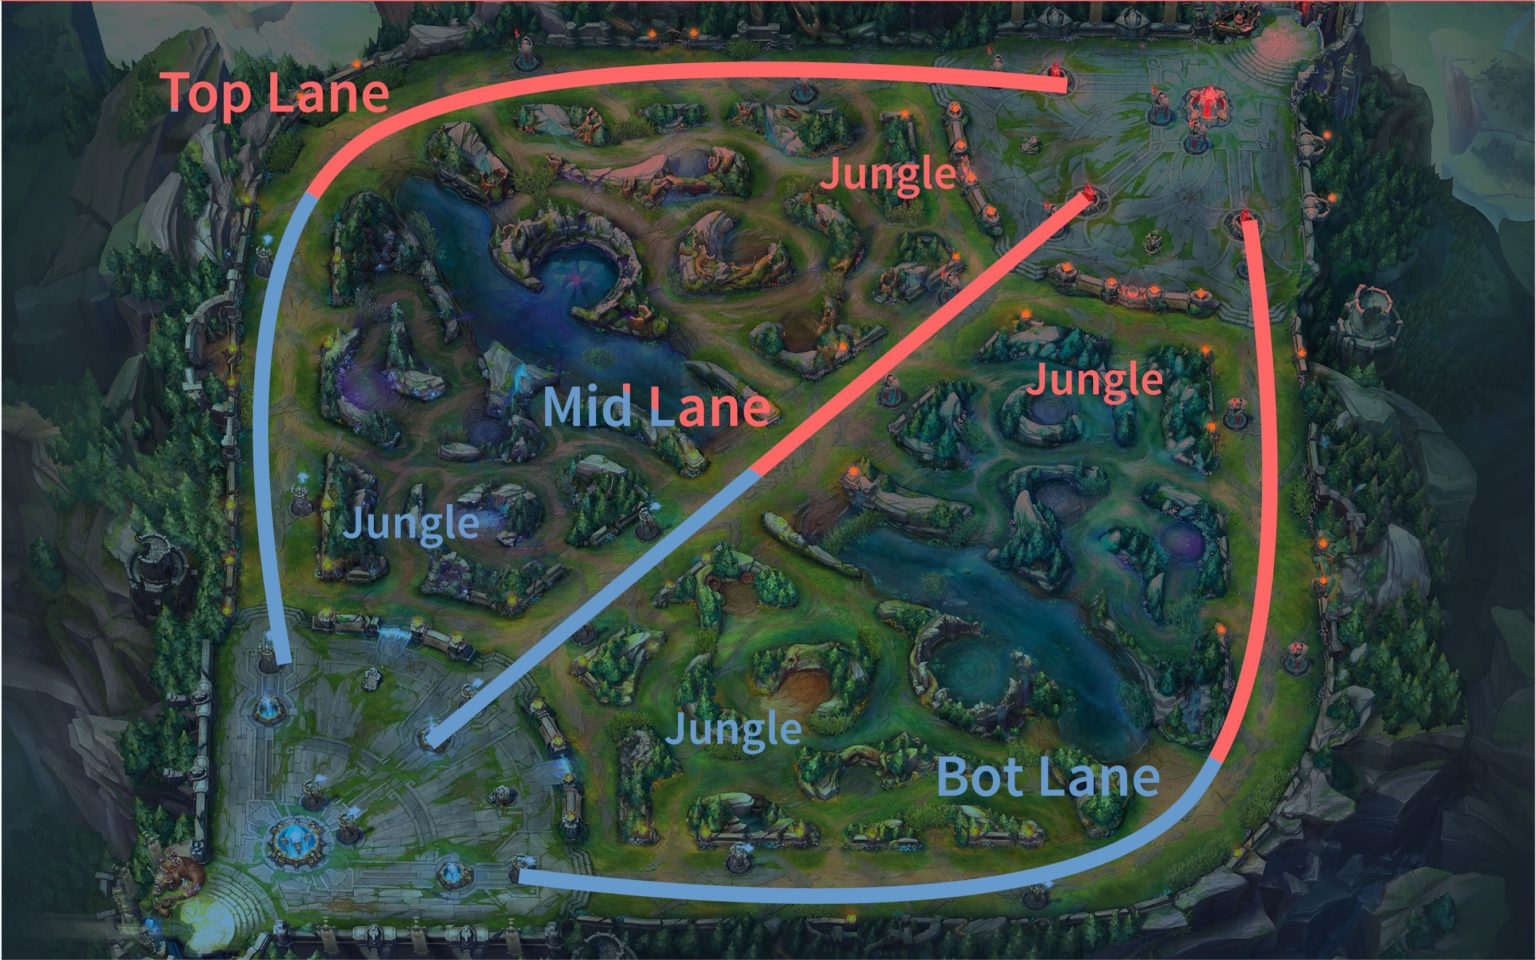

In professional League of Legends competitions, the result of each game is not only decided by the performance of players but also influenced by the pre-match selections of champions called the ban/pick phase. There are meta champions and off-meta champions, and the meta champions usually have better performances in game. Meanwhile, the countering relationships between different champions means that some champions hold advantages when playing against other specific champions in lane or in teamfights. Lastly, different players also have various champion pools, which means that a player can be good at some specific champions and generally performs better when playing as these champions.

Hence, the goal of this project is to predict the win and loss of a professional League of Legends match with the pre-match information including the ban/pick results and the player ids. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [3]:
fp_2020 = os.path.join('LOL Matches Data', '2020_LoL_esports_match_data_from_OraclesElixir_20210419.csv')
df_2020 = pd.read_csv(fp_2020)
data = df_2020

c:\users\zyygf\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_columns', None)

In [6]:
data.shape

(115134, 117)

In [5]:
data.head(12)

gameid datacompleteness  \
0   ESPORTSTMNT03/1241318         complete   
1   ESPORTSTMNT03/1241318         complete   
2   ESPORTSTMNT03/1241318         complete   
3   ESPORTSTMNT03/1241318         complete   
4   ESPORTSTMNT03/1241318         complete   
5   ESPORTSTMNT03/1241318         complete   
6   ESPORTSTMNT03/1241318         complete   
7   ESPORTSTMNT03/1241318         complete   
8   ESPORTSTMNT03/1241318         complete   
9   ESPORTSTMNT03/1241318         complete   
10  ESPORTSTMNT03/1241318         complete   
11  ESPORTSTMNT03/1241318         complete   

                                                  url league  year split  \
0   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
1   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
2   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
3   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
4   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
5   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
6   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
7   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
8   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
9   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
10  http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
11  http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   

    playoffs                 date  game  patch  playerid  side position  \
0          0  2020-01-03 07:33:26     1   9.24         1  Blue      top   
1          0  2020-01-03 07:33:26     1   9.24         2  Blue      jng   
2          0  2020-01-03 07:33:26     1   9.24         3  Blue      mid   
3          0  2020-01-03 07:33:26     1   9.24         4  Blue      bot   
4          0  2020-01-03 07:33:26     1   9.24         5  Blue      sup   
5          0  2020-01-03 07:33:26     1   9.24         6   Red      top   
6          0  2020-01-03 07:33:26     1   9.24         7   Red      jng   
7          0  2020-01-03 07:33:26     1   9.24         8   Red      mid   
8          0  2020-01-03 07:33:26     1   9.24         9   Red      bot   
9          0  2020-01-03 07:33:26     1   9.24        10   Red      sup   
10         0  2020-01-03 07:33:26     1   9.24       100  Blue     team   
11         0  2020-01-03 07:33:26     1   9.24       200   Red     team   

     player            team      champion     ban1    ban2     ban3   ban4  \
0    Summit  SANDBOX Gaming        Rumble  LeBlanc  Irelia  Rek'Sai  Yasuo   
1   OnFleek  SANDBOX Gaming         Elise  LeBlanc  Irelia  Rek'Sai  Yasuo   
2      FATE  SANDBOX Gaming        Qiyana  LeBlanc  Irelia  Rek'Sai  Yasuo   
3       Leo  SANDBOX Gaming  Miss Fortune  LeBlanc  Irelia  Rek'Sai  Yasuo   
4   GorillA  SANDBOX Gaming      Nautilus  LeBlanc  Irelia  Rek'Sai  Yasuo   
5     Canna              T1        Aatrox   Lucian   Akali  Lee Sin   Olaf   
6      Cuzz              T1        Gragas   Lucian   Akali  Lee Sin   Olaf   
7     Faker              T1   Mordekaiser   Lucian   Akali  Lee Sin   Olaf   
8     Teddy              T1         Xayah   Lucian   Akali  Lee Sin   Olaf   
9      Kuri              T1         Rakan   Lucian   Akali  Lee Sin   Olaf   
10      NaN  SANDBOX Gaming           NaN  LeBlanc  Irelia  Rek'Sai  Yasuo   
11      NaN              T1           NaN   Lucian   Akali  Lee Sin   Olaf   

         ban5  gamelength  result  kills  deaths  assists  teamkills  \
0    Renekton        2220       1      0       3        7         17   
1    Renekton        2220       1      4       0        9         17   
2    Renekton        2220       1      5       2        5         17   
3    Renekton        2220       1      7       1        9         17   
4    Renekton        2220       1      1       5        3         17   
5   Jarv

In [6]:
data.patch.unique()

array([ 9.24, 10.01, 10.02, 10.03, 10.04, 10.05, 10.06, 10.07, 10.08,
       10.09, 10.1 , 10.11, 10.12, 10.13, 10.14, 10.15, 10.16, 10.18,
       10.19, 10.2 , 10.21, 10.22, 10.23, 10.24, 10.25])

In [7]:
data[(data['team'] == 'T1') & (data['position'] == 'mid')]

gameid datacompleteness  \
7       ESPORTSTMNT03/1241318         complete   
14      ESPORTSTMNT03/1241322         complete   
26      ESPORTSTMNT03/1241324         complete   
38      ESPORTSTMNT03/1241328         complete   
5234    ESPORTSTMNT01/1302595         complete   
...                       ...              ...   
101966  ESPORTSTMNT03/1443731         complete   
102007  ESPORTSTMNT03/1443737         complete   
114458  ESPORTSTMNT03/1631733         complete   
114590  ESPORTSTMNT03/1631764         complete   
114756  ESPORTSTMNT03/1642105         complete   

                                                      url league  year  \
7       http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   
14      http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   
26      http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   
38      http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   
5234    http://matchhistory.na.leagueoflegends.com/en/...    LCK  2020   
...                                                   ...    ...   ...   
101966  http://matchhistory.na.leagueoflegends.com/en/...    WCS  2020   
102007  http://matchhistory.na.leagueoflegends.com/en/...    WCS  2020   
114458  http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2021   
114590  http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2021   
114756  http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2021   

         split  playoffs                 date  game  patch  playerid  side  \
7          NaN         0  2020-01-03 07:33:26     1   9.24         8   Red   
14         NaN         0  2020-01-03 09:00:58     2   9.24         3  Blue   
26         NaN         0  2020-01-03 10:05:17     3   9.24         3  Blue   
38         NaN         0  2020-01-03 10:57:28     4   9.24         3  Blue   
5234    Spring         0  2020-02-05 06:34:49     1  10.02         3  Blue   
...        ...       ...                  ...   ...    ...       ...   ...   
101966     NaN         0  2020-09-09 08:14:32     2  10.16         3  Blue   
102007     NaN         0  2020-09-09 09:51:04     3  10.16         8   Red   
114458     NaN         0  2020-12-22 09:00:20     1  10.25         3  Blue   
114590     NaN         0  2020-12-22 12:07:51     1  10.25         3  Blue   
114756     NaN         0  2020-12-24 10:46:03     1  10.25         3  Blue   

       position player team     champion     ban1     ban2      ban3     ban4  \
7           mid  Faker   T1  Mordekaiser   Lucian    Akali   Lee Sin     Olaf   
14          mid  Faker   T1      Orianna   Syndra  LeBlanc    Rumble    Braum   
26          mid  Faker   T1  Mordekaiser  LeBlanc   Rumble   Lee Sin   Gragas   
38          mid  Faker   T1     Nautilus   Rumble    Varus   LeBlanc   Aatrox   
5234        mid  Faker   T1       Rumble   Syndra  Taliyah    Lucian  LeBlanc   
...         ...    ...  ...          ...      ...      ...       ...      ...   
101966      mid  Faker   T1        Sylas  Kalista     Azir  Volibear  Orianna   
102007      mid  Faker   T1      Orianna     Ashe  Kalista      Azir    Senna   
114458      mid  Mireu   T1       Anivia      Zoe   Lucian     Leona    Sylas   
114590      mid  Mireu   T1        Galio   Lucian   Graves       Zoe  Alistar   
114756      mid  Mireu   T1       Syndra   Samira   Lucian     Akali  Taliyah   

             ban5  gamelength  result  kills  deaths  assists  teamkills  \
7       Jarvan IV        2220       0      3       3        3         11   
14          Leona        2227       0      0       2        5          5   
26           Olaf        1711       1      5       1        7         21   
38         Syndra        1999       0      2       3        1          4   
5234       Thresh        2441       0      0       4        7         14   
...           ...         ...     ...    ...     ...      ...        ...   
101966      Akali        1903       0      4       2        7         13   
102007     Kai'

In [8]:
data['player'].nunique()

2967

In [9]:
data[(data['game'] == 1) & (data['side'] == 'Red')]['result'].mean()

0.47295889752423687

In [10]:
data.describe()

year       playoffs           game          patch  \
count  115134.000000  115134.000000  115134.000000  115134.000000   
mean     2020.006775       0.145604       1.533222      10.106129   
std         0.082030       0.352711       0.848163       0.064291   
min      2020.000000       0.000000       1.000000       9.240000   
25%      2020.000000       0.000000       1.000000      10.050000   
50%      2020.000000       0.000000       1.000000      10.120000   
75%      2020.000000       0.000000       2.000000      10.150000   
max      2021.000000       1.000000       5.000000      10.250000   

            playerid     gamelength         result          kills  \
count  115134.000000  115134.000000  115134.000000  115134.000000   
mean       29.584588    1936.807268       0.499983       4.657825   
std        57.651956     347.333870       0.500002       5.727149   
min         1.000000     911.000000       0.000000       0.000000   
25%         4.000000    1697.000000       0.000000       1.000000   
50%         6.500000    1898.000000       0.000000       3.000000   
75%        10.000000    2139.000000       1.000000       6.000000   
max       200.000000    3751.000000       1.000000      53.000000   

              deaths        assists      teamkills     teamdeaths  \
count  115134.000000  115134.000000  115134.000000  115134.000000   
mean        4.666892      10.423446      13.973066      14.000400   
std         5.492025      12.484073       7.534211       7.532208   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       3.000000       8.000000       8.000000   
50%         3.000000       7.000000      14.000000      14.000000   
75%         5.000000      11.000000      19.000000      19.000000   
max        53.000000     116.000000      53.000000      53.000000   

         doublekills    triplekills    quadrakills     pentakills  \
count  115098.000000  115098.000000  115128.000000  115128.000000   
mean        0.503197       0.085823       0.013620       0.002536   
std         0.951546       0.317524       0.118939       0.050298   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         9.000000       5.000000       2.000000       1.000000   

          firstblood  firstbloodkill  firstbloodassist  firstbloodvictim  \
count  115104.000000    95534.000000      95504.000000      95504.000000   
mean        0.289086        0.099996          0.148381          0.100006   
std         0.453340        0.299996          0.355479          0.300010   
min         0.000000        0.000000          0.000000          0.000000   
25%         0.000000        0.000000          0.000000          0.000000   
50%         0.000000        0.000000          0.000000          0.000000   
75%         1.000000        0.000000          0.000000          0.000000   
max         1.000000        1.000000          1.000000          1.000000   

            team kpm           ckpm   firstdragon       dragons   opp_dragons  \
count  115134.000000  115134.000000  19098.000000  19190.000000  19190.000000   
mean        0.440656       0.881321      0.499948      2.387337      2.387337   
std         0.253412       0.315328      0.500013      1.450845      1.450845   
min         0.000000       0.139000      0.000000      0.000000      0.000000   
25%         0.245100       0.656000      0.000000      1.000000      1.000000   
50%         0.408200       0.840600      0.000000      2.000000      2.000000   
75%         0.596000       1.054400      1.000000      4.000000      4.000000   
max         1.958200       2.874500      1.000000      7.000000      7.000000   

       elementaldrakes  opp_elementaldrakes     infernals     mountains  \
count     19030.000000         19030.0

In [11]:
row_count = data.groupby('gameid').datacompleteness.count()
incorrect_shape = list(row_count[row_count != 12].index)
incorrect_shape

['6898-9157', '6899-9160', '6901-9168', '6902-9171', '6904-9175']

In [12]:
# remove all games that has less than 12 rows -- missing player data
# by observation, extra note here
# all games with missing rows are from the Demacia Cup in LPL
data = data[~data['gameid'].isin(incorrect_shape)]

In [13]:
data

gameid datacompleteness  \
0       ESPORTSTMNT03/1241318         complete   
1       ESPORTSTMNT03/1241318         complete   
2       ESPORTSTMNT03/1241318         complete   
3       ESPORTSTMNT03/1241318         complete   
4       ESPORTSTMNT03/1241318         complete   
...                       ...              ...   
115129              6903-9182         complete   
115130              6903-9182         complete   
115131              6903-9182         complete   
115132              6903-9182         complete   
115133              6903-9182         complete   

                                                      url league  year split  \
0       http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
1       http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
2       http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
3       http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
4       http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
...                                                   ...    ...   ...   ...   
115129        https://lpl.qq.com/es/stats.shtml?bmid=6903     DC  2020   NaN   
115130        https://lpl.qq.com/es/stats.shtml?bmid=6903     DC  2020   NaN   
115131        https://lpl.qq.com/es/stats.shtml?bmid=6903     DC  2020   NaN   
115132        https://lpl.qq.com/es/stats.shtml?bmid=6903     DC  2020   NaN   
115133        https://lpl.qq.com/es/stats.shtml?bmid=6903     DC  2020   NaN   

        playoffs                 date  game  patch  playerid  side position  \
0              0  2020-01-03 07:33:26     1   9.24         1  Blue      top   
1              0  2020-01-03 07:33:26     1   9.24         2  Blue      jng   
2              0  2020-01-03 07:33:26     1   9.24         3  Blue      mid   
3              0  2020-01-03 07:33:26     1   9.24         4  Blue      bot   
4              0  2020-01-03 07:33:26     1   9.24         5  Blue      sup   
...          ...                  ...   ...    ...       ...   ...      ...   
115129         0  2020-12-27 11:06:00     3  10.25         8   Red      mid   
115130         0  2020-12-27 11:06:00     3  10.25         9   Red      bot   
115131         0  2020-12-27 11:06:00     3  10.25        10   Red      sup   
115132         0  2020-12-27 11:06:00     3  10.25       100  Blue     team   
115133         0  2020-12-27 11:06:00     3  10.25       200   Red     team   

         player            team      champion     ban1     ban2      ban3  \
0        Summit  SANDBOX Gaming        Rumble  LeBlanc   Irelia   Rek'Sai   
1       OnFleek  SANDBOX Gaming         Elise  LeBlanc   Irelia   Rek'Sai   
2          FATE  SANDBOX Gaming        Qiyana  LeBlanc   Irelia   Rek'Sai   
3           Leo  SANDBOX Gaming  Miss Fortune  LeBlanc   Irelia   Rek'Sai   
4       GorillA  SANDBOX Gaming      Nautilus  LeBlanc   Irelia   Rek'Sai   
...         ...             ...           ...      ...      ...       ...   
115129   Shanks         Team WE          Ekko     Ornn      Zoe     Akali   
115130  Jiumeng         Team WE        Samira     Ornn      Zoe     Akali   
115131  Missing         Team WE         Leona     Ornn      Zoe     Akali   
115132      NaN     Top Esports           NaN  Orianna  Camille  Renekton   
115133      NaN         Team WE           NaN     Ornn      Zoe     Akali   

          ban4      ban5  gamelength  result  kills  deaths  assists  \
0        Yasuo  Renekton        2220       1      0       3        7   
1        Yasuo  Renekton        2220       1      4       0        9   
2        Yasuo  Renekton        2220       1      5       2        5   
3        Yasuo  Renekton        2220       1      7       1        9   
4        Yasuo  Renekton        2220       1      1       5        3   
...        ...       ...         ...     ...    ...     ...      ...   
115129  Kennen    Aatrox        1777       0      4       2        0   
115130  Ken

In [14]:
data.patch.unique()

array([ 9.24, 10.01, 10.02, 10.03, 10.04, 10.05, 10.06, 10.07, 10.08,
       10.09, 10.1 , 10.11, 10.12, 10.13, 10.14, 10.15, 10.16, 10.18,
       10.19, 10.2 , 10.21, 10.22, 10.23, 10.24, 10.25])

In [15]:
data['team'].nunique()

478

In [16]:
data['champion'].nunique()

153

In [17]:
data[data['champion'] == 'Rumble'].groupby('position')['result'].mean()

position
bot    0.571429
jng    0.666667
mid    0.480296
sup    0.393939
top    0.488584
Name: result, dtype: float64

In [18]:
def winrate_position(df):
    champions = df['champion'].unique()
    ans = pd.DataFrame(pd.DataFrame(columns=['top', 'jng', 'mid', 'bot', 'sup']))
    for c in champions:
        ans = ans.append(df[df['champion'] == c].groupby('position')['result'].mean(), ignore_index = True)
    ans.index = champions
    return ans

In [19]:
winrate_position(data)

top       jng       mid       bot       sup
Rumble        0.488584  0.666667  0.480296  0.571429  0.393939
Elise         0.000000  0.484157  1.000000       NaN       NaN
Qiyana        0.300000  0.589041  0.535593  0.500000  0.000000
Miss Fortune  1.000000       NaN       NaN  0.506836  0.000000
Nautilus      0.600000  0.000000  0.357143  0.333333  0.492318
...                ...       ...       ...       ...       ...
Udyr               NaN  1.000000       NaN       NaN       NaN
Yone               NaN       NaN  0.558442  0.000000       NaN
Samira             NaN       NaN  0.000000  0.492308       NaN
Seraphine          NaN       NaN  1.000000       NaN  0.500000
Rell               NaN       NaN       NaN       NaN  0.000000

[154 rows x 5 columns]

In [20]:
top_winrate_matrix = pd.pivot_table(concated_data, values='result', index=['blue_top_champion'], columns=['red_top_champion'], aggfunc='mean')
top_winrate_matrix

NameError: name 'concated_data' is not defined

## data cleaning (important)

In [23]:
# seperate data by positions and sides
columns_needed = ['gameid', 'player', 'champion']
blue_top = data[(data['side'] == 'Blue') & (data['position'] == 'top')][columns_needed].set_index('gameid')
blue_jng = data[(data['side'] == 'Blue') & (data['position'] == 'jng')][columns_needed].set_index('gameid')
blue_mid = data[(data['side'] == 'Blue') & (data['position'] == 'mid')][columns_needed].set_index('gameid')
blue_bot = data[(data['side'] == 'Blue') & (data['position'] == 'bot')][columns_needed].set_index('gameid')
blue_sup = data[(data['side'] == 'Blue') & (data['position'] == 'sup')][columns_needed].set_index('gameid')
blue_team = data[(data['side'] == 'Blue') & (data['position'] == 'team')][['gameid', 'result']].set_index('gameid')
red_top = data[(data['side'] == 'Red') & (data['position'] == 'top')][columns_needed].set_index('gameid')
red_jng = data[(data['side'] == 'Red') & (data['position'] == 'jng')][columns_needed].set_index('gameid')
red_mid = data[(data['side'] == 'Red') & (data['position'] == 'mid')][columns_needed].set_index('gameid')
red_bot = data[(data['side'] == 'Red') & (data['position'] == 'bot')][columns_needed].set_index('gameid')
red_sup = data[(data['side'] == 'Red') & (data['position'] == 'sup')][columns_needed].set_index('gameid')
red_team = data[(data['side'] == 'Red') & (data['position'] == 'team')][['gameid', 'result']].set_index('gameid')

In [24]:
# after concat, 0 = Blue vicotry, 1 = Red victory
dfs = [blue_top, blue_jng, blue_mid, blue_bot, blue_sup, red_top, red_jng, red_mid, red_bot, red_sup, red_team]
concated_data = pd.concat(dfs, axis = 1)
concated_data.columns = ['blue_top_player', 'blue_top_champion', 
                         'blue_jng_player', 'blue_jng_champion', 
                         'blue_mid_player', 'blue_mid_champion', 
                         'blue_bot_player', 'blue_bot_champion', 
                         'blue_sup_player', 'blue_sup_champion', 
                         'red_top_player', 'red_top_champion', 
                         'red_jng_player', 'red_jng_champion', 
                         'red_mid_player', 'red_mid_champion', 
                         'red_bot_player', 'red_bot_champion', 
                         'red_sup_player', 'red_sup_champion', 
                         'result'
                        ]
concated_data

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT03/1241318          Summit            Rumble         OnFleek   
ESPORTSTMNT03/1241322           Canna             Jayce            Cuzz   
ESPORTSTMNT03/1241324           Roach          Renekton            Cuzz   
ESPORTSTMNT03/1241328           Roach          Pantheon            Cuzz   
ESPORTSTMNT03/1241386           Doran       Mordekaiser          Pyosik   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078           Doran              Ornn          Bonnie   
6903-9180                     Breathe           Camille        beishang   
ESPORTSTMNT03/1632082          Castle          Pantheon          GIDEON   
6903-9181                     Breathe            Kennen        beishang   
6903-9182                         369          Malphite           Karsa   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT03/1241318             Elise            FATE            Qiyana   
ESPORTSTMNT03/1241322         Jarvan IV           Faker           Orianna   
ESPORTSTMNT03/1241324           Rek'Sai           Faker       Mordekaiser   
ESPORTSTMNT03/1241328             Elise           Faker          Nautilus   
ESPORTSTMNT03/1241386         Jarvan IV           Chovy              Ryze   
...                                 ...             ...               ...   
ESPORTSTMNT03/1632078           Hecarim            Ucal            Viktor   
6903-9180                       Sejuani          Shanks           Orianna   
ESPORTSTMNT03/1632082            Graves           VicLa             Galio   
6903-9181                          Olaf          Shanks             Galio   
6903-9182                        Graves          knight            Syndra   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT03/1241318             Leo      Miss Fortune         GorillA   
ESPORTSTMNT03/1241322           Teddy      Miss Fortune          Effort   
ESPORTSTMNT03/1241324           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241328           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241386            Deft             Xayah           Keria   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078          HyBriD            Kai'Sa            Zzus   
6903-9180                     Jiumeng      Miss Fortune         Missing   
ESPORTSTMNT03/1632082            Noah          Aphelios           Rebel   
6903-9181                     Jiumeng            Kai'Sa         Missing   
6903-9182                  JackeyLove            Kai'Sa            Zhuo   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT03/1241318          Nautilus          Canna           Aatrox   
ESPORTSTMNT03/1241322          Nautilus         Summit           Aatrox   
ESPORTSTMNT03/1241324             Rakan         Summit           Aatrox   
ESPORTSTMNT03/1241328             Rakan         Summit            Quinn   
ESPORTSTMNT03/1241386             Rakan           Kiin         Renekton   
...                                 ...            ...              ...   
ESPORTSTMNT03/1632078           Alistar           Rich           Aatrox   
6903-9180                       Alistar            369             Ornn   
ESPORTSTMNT03/1632082            Thresh           Rich         Volibear   
6903-9181                          Sett            369            Akali   
6903-9182                       Alistar        Breathe             Sett   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

In [25]:
predictors = ['blue_top_player', 'blue_top_champion', 
              'blue_jng_player', 'blue_jng_champion', 
              'blue_mid_player', 'blue_mid_champion', 
              'blue_bot_player', 'blue_bot_champion', 
              'blue_sup_player', 'blue_sup_champion', 
              'red_top_player', 'red_top_champion', 
              'red_jng_player', 'red_jng_champion', 
              'red_mid_player', 'red_mid_champion', 
              'red_bot_player', 'red_bot_champion', 
              'red_sup_player', 'red_sup_champion']

X = concated_data[predictors]
y = concated_data['result']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
ohe = OneHotEncoder(handle_unknown='ignore')
ct = ColumnTransformer([('ohe', ohe, predictors)])

In [28]:
ct.fit(X_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['blue_top_player', 'blue_top_champion',
                                  'blue_jng_player', 'blue_jng_champion',
                                  'blue_mid_player', 'blue_mid_champion',
                                  'blue_bot_player', 'blue_bot_champion',
                                  'blue_sup_player', 'blue_sup_champion',
                                  'red_top_player', 'red_top_champion',
                                  'red_jng_player', 'red_jng_champion',
                                  'red_mid_player', 'red_mid_champion',
                                  'red_bot_player', 'red_bot_champion',
                                  'red_sup_player', 'red_sup_champion'])])

In [29]:
# potential variables: C, solver
pl = Pipeline([('transform', ct), ('regression', LogisticRegression())])

In [30]:
pl.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['blue_top_player',
                                                   'blue_top_champion',
                                                   'blue_jng_player',
                                                   'blue_jng_champion',
                                                   'blue_mid_player',
                                                   'blue_mid_champion',
                                                   'blue_bot_player',
                                                   'blue_bot_champion',
                                                   'blue_sup_player',
                                                   'blue_sup_champion',
                                                   'red_top_player',
                                            

In [31]:
pl.score(X_train, y_train)

0.828206465067779

In [32]:
pl.score(X_test, y_test)

0.643378519290928

In [33]:
pl.score(X, y)

0.7912408759124088

In [34]:
concated_data

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT03/1241318          Summit            Rumble         OnFleek   
ESPORTSTMNT03/1241322           Canna             Jayce            Cuzz   
ESPORTSTMNT03/1241324           Roach          Renekton            Cuzz   
ESPORTSTMNT03/1241328           Roach          Pantheon            Cuzz   
ESPORTSTMNT03/1241386           Doran       Mordekaiser          Pyosik   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078           Doran              Ornn          Bonnie   
6903-9180                     Breathe           Camille        beishang   
ESPORTSTMNT03/1632082          Castle          Pantheon          GIDEON   
6903-9181                     Breathe            Kennen        beishang   
6903-9182                         369          Malphite           Karsa   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT03/1241318             Elise            FATE            Qiyana   
ESPORTSTMNT03/1241322         Jarvan IV           Faker           Orianna   
ESPORTSTMNT03/1241324           Rek'Sai           Faker       Mordekaiser   
ESPORTSTMNT03/1241328             Elise           Faker          Nautilus   
ESPORTSTMNT03/1241386         Jarvan IV           Chovy              Ryze   
...                                 ...             ...               ...   
ESPORTSTMNT03/1632078           Hecarim            Ucal            Viktor   
6903-9180                       Sejuani          Shanks           Orianna   
ESPORTSTMNT03/1632082            Graves           VicLa             Galio   
6903-9181                          Olaf          Shanks             Galio   
6903-9182                        Graves          knight            Syndra   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT03/1241318             Leo      Miss Fortune         GorillA   
ESPORTSTMNT03/1241322           Teddy      Miss Fortune          Effort   
ESPORTSTMNT03/1241324           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241328           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241386            Deft             Xayah           Keria   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078          HyBriD            Kai'Sa            Zzus   
6903-9180                     Jiumeng      Miss Fortune         Missing   
ESPORTSTMNT03/1632082            Noah          Aphelios           Rebel   
6903-9181                     Jiumeng            Kai'Sa         Missing   
6903-9182                  JackeyLove            Kai'Sa            Zhuo   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT03/1241318          Nautilus          Canna           Aatrox   
ESPORTSTMNT03/1241322          Nautilus         Summit           Aatrox   
ESPORTSTMNT03/1241324             Rakan         Summit           Aatrox   
ESPORTSTMNT03/1241328             Rakan         Summit            Quinn   
ESPORTSTMNT03/1241386             Rakan           Kiin         Renekton   
...                                 ...            ...              ...   
ESPORTSTMNT03/1632078           Alistar           Rich           Aatrox   
6903-9180                       Alistar            369             Ornn   
ESPORTSTMNT03/1632082            Thresh           Rich         Volibear   
6903-9181                          Sett            369            Akali   
6903-9182                       Alistar        Breathe             Sett   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

In [35]:
concated_data['result'].mean()

0.4714285714285714

In [36]:
data[data['league'] == 'DC']['team'].unique()

array(['LNG Esports', 'unknown team', 'FunPlus Phoenix', 'Oh My God',
       'Shu Dai Xiong Gaming', 'Vici Gaming', 'Legend Esport Gaming',
       'EDward Gaming', 'Rogue Warriors', 'Victory Five', 'eStar',
       'Invictus Gaming', 'Bilibili Gaming', 'Team WE', 'Young Miracles',
       'Royal Never Give Up', 'ThunderTalk Gaming', 'Top Esports',
       'Suning', 'JD Gaming', 'LGD Gaming'], dtype=object)

## Adding more variables / change methods

In [34]:
concated_data = concated_data[~concated_data.index.to_series().isna()]
concated_data

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT03/1241318          Summit            Rumble         OnFleek   
ESPORTSTMNT03/1241322           Canna             Jayce            Cuzz   
ESPORTSTMNT03/1241324           Roach          Renekton            Cuzz   
ESPORTSTMNT03/1241328           Roach          Pantheon            Cuzz   
ESPORTSTMNT03/1241386           Doran       Mordekaiser          Pyosik   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078           Doran              Ornn          Bonnie   
6903-9180                     Breathe           Camille        beishang   
ESPORTSTMNT03/1632082          Castle          Pantheon          GIDEON   
6903-9181                     Breathe            Kennen        beishang   
6903-9182                         369          Malphite           Karsa   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT03/1241318             Elise            FATE            Qiyana   
ESPORTSTMNT03/1241322         Jarvan IV           Faker           Orianna   
ESPORTSTMNT03/1241324           Rek'Sai           Faker       Mordekaiser   
ESPORTSTMNT03/1241328             Elise           Faker          Nautilus   
ESPORTSTMNT03/1241386         Jarvan IV           Chovy              Ryze   
...                                 ...             ...               ...   
ESPORTSTMNT03/1632078           Hecarim            Ucal            Viktor   
6903-9180                       Sejuani          Shanks           Orianna   
ESPORTSTMNT03/1632082            Graves           VicLa             Galio   
6903-9181                          Olaf          Shanks             Galio   
6903-9182                        Graves          knight            Syndra   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT03/1241318             Leo      Miss Fortune         GorillA   
ESPORTSTMNT03/1241322           Teddy      Miss Fortune          Effort   
ESPORTSTMNT03/1241324           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241328           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241386            Deft             Xayah           Keria   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078          HyBriD            Kai'Sa            Zzus   
6903-9180                     Jiumeng      Miss Fortune         Missing   
ESPORTSTMNT03/1632082            Noah          Aphelios           Rebel   
6903-9181                     Jiumeng            Kai'Sa         Missing   
6903-9182                  JackeyLove            Kai'Sa            Zhuo   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT03/1241318          Nautilus          Canna           Aatrox   
ESPORTSTMNT03/1241322          Nautilus         Summit           Aatrox   
ESPORTSTMNT03/1241324             Rakan         Summit           Aatrox   
ESPORTSTMNT03/1241328             Rakan         Summit            Quinn   
ESPORTSTMNT03/1241386             Rakan           Kiin         Renekton   
...                                 ...            ...              ...   
ESPORTSTMNT03/1632078           Alistar           Rich           Aatrox   
6903-9180                       Alistar            369             Ornn   
ESPORTSTMNT03/1632082            Thresh           Rich         Volibear   
6903-9181                          Sett            369            Akali   
6903-9182                       Alistar        Breathe             Sett   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

In [35]:
predictors = ['blue_top_player', 'blue_top_champion', 
              'blue_jng_player', 'blue_jng_champion', 
              'blue_mid_player', 'blue_mid_champion', 
              'blue_bot_player', 'blue_bot_champion', 
              'blue_sup_player', 'blue_sup_champion', 
              'red_top_player', 'red_top_champion', 
              'red_jng_player', 'red_jng_champion', 
              'red_mid_player', 'red_mid_champion', 
              'red_bot_player', 'red_bot_champion', 
              'red_sup_player', 'red_sup_champion']

X = concated_data[predictors]
y = concated_data['result']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Read in OOT data -- 2021 data

In [37]:
fp_2021 = os.path.join('LOL Matches Data', '2021_LoL_esports_match_data_from_OraclesElixir_20210530.csv')
df_2021 = pd.read_csv(fp_2021)
oot_data = df_2021

In [38]:
row_count_oot = oot_data.groupby('gameid').datacompleteness.count()
incorrect_shape_oot = list(row_count_oot[row_count_oot != 12].index)
oot_data = oot_data[~oot_data['gameid'].isin(incorrect_shape_oot)]

In [39]:
columns_needed = ['gameid', 'player', 'champion']
blue_top = oot_data[(oot_data['side'] == 'Blue') & (oot_data['position'] == 'top')][columns_needed].set_index('gameid')
blue_jng = oot_data[(oot_data['side'] == 'Blue') & (oot_data['position'] == 'jng')][columns_needed].set_index('gameid')
blue_mid = oot_data[(oot_data['side'] == 'Blue') & (oot_data['position'] == 'mid')][columns_needed].set_index('gameid')
blue_bot = oot_data[(oot_data['side'] == 'Blue') & (oot_data['position'] == 'bot')][columns_needed].set_index('gameid')
blue_sup = oot_data[(oot_data['side'] == 'Blue') & (oot_data['position'] == 'sup')][columns_needed].set_index('gameid')
blue_team = oot_data[(oot_data['side'] == 'Blue') & (oot_data['position'] == 'team')][['gameid', 'result']].set_index('gameid')
red_top = oot_data[(oot_data['side'] == 'Red') & (oot_data['position'] == 'top')][columns_needed].set_index('gameid')
red_jng = oot_data[(oot_data['side'] == 'Red') & (oot_data['position'] == 'jng')][columns_needed].set_index('gameid')
red_mid = oot_data[(oot_data['side'] == 'Red') & (oot_data['position'] == 'mid')][columns_needed].set_index('gameid')
red_bot = oot_data[(oot_data['side'] == 'Red') & (oot_data['position'] == 'bot')][columns_needed].set_index('gameid')
red_sup = oot_data[(oot_data['side'] == 'Red') & (oot_data['position'] == 'sup')][columns_needed].set_index('gameid')
red_team = oot_data[(oot_data['side'] == 'Red') & (oot_data['position'] == 'team')][['gameid', 'result']].set_index('gameid')

In [40]:
# after concat, 0 = Blue vicotry, 1 = Red victory
dfs_oot = [blue_top, blue_jng, blue_mid, blue_bot, blue_sup, red_top, red_jng, red_mid, red_bot, red_sup, red_team]
concated_data_oot = pd.concat(dfs_oot, axis = 1)
concated_data_oot.columns = ['blue_top_player', 'blue_top_champion', 
                         'blue_jng_player', 'blue_jng_champion', 
                         'blue_mid_player', 'blue_mid_champion', 
                         'blue_bot_player', 'blue_bot_champion', 
                         'blue_sup_player', 'blue_sup_champion', 
                         'red_top_player', 'red_top_champion', 
                         'red_jng_player', 'red_jng_champion', 
                         'red_mid_player', 'red_mid_champion', 
                         'red_bot_player', 'red_bot_champion', 
                         'red_sup_player', 'red_sup_champion', 
                         'result'
                        ]

In [41]:
concated_data_oot = concated_data_oot[~concated_data_oot.index.to_series().isna()]

In [42]:
concated_data_oot

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT03/1632489            Khan       Mordekaiser          Canyon   
ESPORTSTMNT03/1632500            Rich            Gragas          Peanut   
ESPORTSTMNT03/1632502            Rich            Gragas          Peanut   
6909-9183                         369             Karma           Karsa   
6909-9184                         369               Jax           Karsa   
...                               ...               ...             ...   
ESPORTSTMNT01/1995059        Manolito           Lee Sin          EXIMUS   
ESPORTSTMNT01/1995085        Rockstar              Ornn          Xeydon   
ESPORTSTMNT01/1995097      LukasNegro             Jayce         Kartana   
ESPORTSTMNT01/1995099         Scrappy          Renekton            Sami   
ESPORTSTMNT01/1995121        Deratero              Gnar       Funky Dog   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT03/1632489            Graves       ShowMaker               Zoe   
ESPORTSTMNT03/1632500            Graves             Bay            Rumble   
ESPORTSTMNT03/1632502            Graves             Bay               Zoe   
6909-9183                      Pantheon          knight            Syndra   
6909-9184                       Hecarim          knight           Orianna   
...                                 ...             ...               ...   
ESPORTSTMNT01/1995059            Gragas             Emp             Yasuo   
ESPORTSTMNT01/1995085              Udyr          KearZy             Sylas   
ESPORTSTMNT01/1995097              Udyr          Kirito               Zoe   
ESPORTSTMNT01/1995099           Morgana         Alowhed            Lucian   
ESPORTSTMNT01/1995121            Rumble       Wandering             Yasuo   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT03/1632489           Ghost      Miss Fortune           BeryL   
ESPORTSTMNT03/1632500         deokdam            Kai'Sa          Kellin   
ESPORTSTMNT03/1632502         deokdam             Yasuo          Kellin   
6909-9183                  JackeyLove            Samira            Zhuo   
6909-9184                  JackeyLove            Samira            Zhuo   
...                               ...               ...             ...   
ESPORTSTMNT01/1995059          Viciun          Tristana          Feitan   
ESPORTSTMNT01/1995085             AZR             Xayah         Efïmerø   
ESPORTSTMNT01/1995097           Emets            Kai'Sa        Severity   
ESPORTSTMNT01/1995099           Kayse              Jhin          Duivel   
ESPORTSTMNT01/1995121          Wonder            Kai'Sa         Sholwan   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT03/1632489             Galio           Rich             Ornn   
ESPORTSTMNT03/1632500           Alistar           Khan             Ornn   
ESPORTSTMNT03/1632502           Alistar           Khan           Rumble   
6909-9183                         Leona            Bin           Aatrox   
6909-9184                       Alistar            Bin          Camille   
...                                 ...            ...              ...   
ESPORTSTMNT01/1995059           Alistar        Furiozz           Singed   
ESPORTSTMNT01/1995085             Leona      Antimagic         Nocturne   
ESPORTSTMNT01/1995097             Leona           Knod          Lee Sin   
ESPORTSTMNT01/1995099           Alistar         Arfyss             Gnar   
ESPORTSTMNT01/1995121            Gragas         Kryzpo            Jayce   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

### Layer 1

In [43]:
predictors = ['blue_top_player', 'blue_top_champion', 
              'blue_jng_player', 'blue_jng_champion', 
              'blue_mid_player', 'blue_mid_champion', 
              'blue_bot_player', 'blue_bot_champion', 
              'blue_sup_player', 'blue_sup_champion', 
              'red_top_player', 'red_top_champion', 
              'red_jng_player', 'red_jng_champion', 
              'red_mid_player', 'red_mid_champion', 
              'red_bot_player', 'red_bot_champion', 
              'red_sup_player', 'red_sup_champion']

X = concated_data[predictors]
y = concated_data['result']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
X_test

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT01/1315583           Zeros            Irelia            Levi   
ESPORTSTMNT04/1240159      StarScreen          Volibear          Ferret   
6396-8304                       Lilac          Renekton          Maggie   
ESPORTSTMNT01/1300231          Rubi0o            Aatrox        Rulfchen   
ESPORTSTMNT04/1120529         Karisas            Aatrox        Jaunatis   
...                               ...               ...             ...   
ESPORTSTMNT03/1412918           Ayato              Ornn          Sephis   
ESPORTSTMNT01/1401778           Hidan             Jayce         Minerva   
6294-7941                      Decade            Wukong           elves   
6526-8767                   September              Ornn        XiaoXuan   
ESPORTSTMNT04/1230420           Lenom      Fiddlesticks           Julbu   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT01/1315583           Lee Sin            Dia1           LeBlanc   
ESPORTSTMNT04/1240159           Nidalee           Serin              Azir   
6396-8304                        Graves           forse               Zoe   
ESPORTSTMNT01/1300231            Gragas          Zwyroo             Yasuo   
ESPORTSTMNT04/1120529            Graves           arnax          Tristana   
...                                 ...             ...               ...   
ESPORTSTMNT03/1412918          Volibear        Krastyel           Orianna   
ESPORTSTMNT01/1401778              Olaf        NOsFerus            Syndra   
6294-7941                       Trundle          Akaman      Twisted Fate   
6526-8767                       Kindred          badboy              Ekko   
ESPORTSTMNT04/1230420           Trundle          Midkid        Cassiopeia   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT01/1315583          Blazes          Aphelios         Palette   
ESPORTSTMNT04/1240159           Kaori            Ezreal             Pbd   
6396-8304                       Assum            Ezreal           Cruel   
ESPORTSTMNT01/1300231        Nixerino             Senna            Homi   
ESPORTSTMNT04/1120529       Lakinther            Syndra           Gnome   
...                               ...               ...             ...   
ESPORTSTMNT03/1412918            RIVA           Kalista          BocaJR   
ESPORTSTMNT01/1401778           Klaus            Ezreal       Professor   
6294-7941                     Picachu            Kai'Sa            Xuan   
6526-8767                        Xing          Aphelios              Ke   
ESPORTSTMNT04/1230420            Neos          Aphelios           Algos   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT01/1315583             Yuumi         Coated            Jayce   
ESPORTSTMNT04/1240159             Braum          pr1me           Aatrox   
6396-8304                         Karma        Alielie             Gnar   
ESPORTSTMNT01/1300231             Shaco           Kubu         Vladimir   
ESPORTSTMNT04/1120529        Blitzcrank          Omena             Gnar   
...                                 ...            ...              ...   
ESPORTSTMNT03/1412918          Nautilus          Guigo      Mordekaiser   
ESPORTSTMNT01/1401778             Yuumi           Yang           Aatrox   
6294-7941                          Sett          Coten         Renekton   
6526-8767                          Sett           Cult      Mordekaiser   
ESPORTSTMNT04/1230420          Nautilus          Madly           Wukong   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

In [46]:
training_data = X_train.assign(result = y_train)

In [47]:
tester = training_data.groupby('blue_bot_champion')['result'].mean()
#tester['Mordekaiser']
#pd.to_numeric(X_test['blue_top_champion'].replace(tester), errors='coerce').fillna(0.5)
#X_test['blue_top_champion']

#pd.to_numeric(X_test['blue_bot_champion'].replace(tester), errors='coerce').fillna(0.5)
pd.to_numeric(X_test['blue_bot_champion'].replace(tester), errors='coerce').fillna(0.471)

gameid
ESPORTSTMNT01/1315583    0.433870
ESPORTSTMNT04/1240159    0.476471
6396-8304                0.476471
ESPORTSTMNT01/1300231    0.480499
ESPORTSTMNT04/1120529    0.564706
                           ...   
ESPORTSTMNT03/1412918    0.456311
ESPORTSTMNT01/1401778    0.476471
6294-7941                0.590580
6526-8767                0.433870
ESPORTSTMNT04/1230420    0.433870
Name: blue_bot_champion, Length: 1914, dtype: float64

In [48]:
cols = ['blue_top_champion', 'blue_jng_champion', 'blue_mid_champion', 'blue_bot_champion', 'blue_sup_champion', 
       'red_top_champion', 'red_jng_champion', 'red_mid_champion', 'red_bot_champion', 'red_sup_champion']

# cols = ['blue_top_player', 'blue_top_champion', 
#         'blue_jng_player', 'blue_jng_champion', 
#         'blue_mid_player', 'blue_mid_champion', 
#         'blue_bot_player', 'blue_bot_champion', 
#         'blue_sup_player', 'blue_sup_champion', 
#         'red_top_player', 'red_top_champion', 
#         'red_jng_player', 'red_jng_champion', 
#         'red_mid_player', 'red_mid_champion', 
#         'red_bot_player', 'red_bot_champion', 
#         'red_sup_player', 'red_sup_champion']

X_train_new = X_train.copy()
X_test_new = X_test.copy()

for col in cols:
    winrate_position = training_data.groupby(col)['result'].mean()
    new_train = X_train[col].replace(winrate_position)
    X_train_new[col] = new_train
    new_test = pd.to_numeric(X_test[col].replace(winrate_position), errors='coerce').fillna(0.471)
    X_test_new[col] = new_test
    
X_test_new

blue_top_player  blue_top_champion blue_jng_player  \
gameid                                                                     
ESPORTSTMNT01/1315583           Zeros           0.520000            Levi   
ESPORTSTMNT04/1240159      StarScreen           0.498099          Ferret   
6396-8304                       Lilac           0.458838          Maggie   
ESPORTSTMNT01/1300231          Rubi0o           0.483688        Rulfchen   
ESPORTSTMNT04/1120529         Karisas           0.483688        Jaunatis   
...                               ...                ...             ...   
ESPORTSTMNT03/1412918           Ayato           0.489002          Sephis   
ESPORTSTMNT01/1401778           Hidan           0.495652         Minerva   
6294-7941                      Decade           0.488950           elves   
6526-8767                   September           0.489002        XiaoXuan   
ESPORTSTMNT04/1230420           Lenom           0.500000           Julbu   

                       blue_jng_champion blue_mid_player  blue_mid_champion  \
gameid                                                                        
ESPORTSTMNT01/1315583           0.499404            Dia1           0.427992   
ESPORTSTMNT04/1240159           0.434211           Serin           0.489426   
6396-8304                       0.462529           forse           0.421613   
ESPORTSTMNT01/1300231           0.441253          Zwyroo           0.516854   
ESPORTSTMNT04/1120529           0.462529           arnax           0.388889   
...                                  ...             ...                ...   
ESPORTSTMNT03/1412918           0.442211        Krastyel           0.487179   
ESPORTSTMNT01/1401778           0.525275        NOsFerus           0.472579   
6294-7941                       0.443329          Akaman           0.442308   
6526-8767                       0.472000          badboy           0.422222   
ESPORTSTMNT04/1230420           0.443329          Midkid           0.466942   

                      blue_bot_player  blue_bot_champion blue_sup_player  \
gameid                                                                     
ESPORTSTMNT01/1315583          Blazes           0.433870         Palette   
ESPORTSTMNT04/1240159           Kaori           0.476471             Pbd   
6396-8304                       Assum           0.476471           Cruel   
ESPORTSTMNT01/1300231        Nixerino           0.480499            Homi   
ESPORTSTMNT04/1120529       Lakinther           0.564706           Gnome   
...                               ...                ...             ...   
ESPORTSTMNT03/1412918            RIVA           0.456311          BocaJR   
ESPORTSTMNT01/1401778           Klaus           0.476471       Professor   
6294-7941                     Picachu           0.590580            Xuan   
6526-8767                        Xing           0.433870              Ke   
ESPORTSTMNT04/1230420            Neos           0.433870           Algos   

                       blue_sup_champion red_top_player  red_top_champion  \
gameid                                                                      
ESPORTSTMNT01/1315583           0.533742         Coated          0.441341   
ESPORTSTMNT04/1240159           0.478431          pr1me          0.466960   
6396-8304                       0.515759        Alielie          0.371901   
ESPORTSTMNT01/1300231           0.471000           Kubu          0.528169   
ESPORTSTMNT04/1120529           0.457746          Omena          0.371901   
...                                  ...            ...               ...   
ESPORTSTMNT03/1412918           0.482759          Guigo          0.461690   
ESPORTSTMNT01/1401778           0.533742           Yang          0.466960   
6294-7941                       0.505455          Coten          0.507874   
6526-8767                       0.505455           Cult          0.461690   
ESPORTSTMNT04/1230420           0.482759          Madly          0.530997   

              

In [49]:
champions = ['blue_top_champion', 'blue_jng_champion', 'blue_mid_champion', 'blue_bot_champion', 'blue_sup_champion', 
             'red_top_champion', 'red_jng_champion', 'red_mid_champion', 'red_bot_champion', 'red_sup_champion']

players = ['blue_top_player', 'blue_jng_player', 'blue_mid_player', 'blue_bot_player', 'blue_sup_player', 
           'red_top_player', 'red_jng_player', 'red_mid_player', 'red_bot_player', 'red_sup_player']


ohe1 = OneHotEncoder(handle_unknown='ignore')
fc1 = FunctionTransformer(lambda x:x)
ct1 = ColumnTransformer([('ohe', ohe1, players), ('fc', fc1, champions)])

In [50]:
pl1 = Pipeline([('transform', ct1), ('regression', LogisticRegression())])

In [51]:
pl1.fit(X_train_new, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['blue_top_player',
                                                   'blue_jng_player',
                                                   'blue_mid_player',
                                                   'blue_bot_player',
                                                   'blue_sup_player',
                                                   'red_top_player',
                                                   'red_jng_player',
                                                   'red_mid_player',
                                                   'red_bot_player',
                                                   'red_sup_player']),
                                                 ('fc',
                                                  FunctionTransformer(

In [52]:
pl1.score(X_train_new, y_train)

0.8236677115987461

In [53]:
pl1.score(X_test_new, y_test)

0.6269592476489029

### Layer 2

In [54]:
training_data = X_train.assign(result = y_train)
training_data

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT01/1423867            Azus            Maokai  unknown player   
ESPORTSTMNT02/1292244        Sleeping            Aatrox          Gilius   
ESPORTSTMNT01/1306181             CHP       Mordekaiser             PHT   
ESPORTSTMNT01/1430722         Truklax              Ornn           Own3r   
6617-8454                      TheShy            Kennen            Ning   
...                               ...               ...             ...   
66589-71199                 Xiaoxiang              Ornn          Jiejie   
ESPORTSTMNT06/1270719         NoNHoly          Volibear    MightyDragon   
NA1/3470246809                  Rodov            Rumble       MikeYeung   
ESPORTSTMNT03/1351037          Hanabi         Gangplank           River   
ESPORTSTMNT02/1386227            Smeb          Renekton            bonO   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT01/1423867         Jarvan IV  unknown player           Orianna   
ESPORTSTMNT02/1292244            Gragas         Sertuss           LeBlanc   
ESPORTSTMNT01/1306181            Graves          KemKen            Soraka   
ESPORTSTMNT01/1430722            Graves            Xaky            Syndra   
6617-8454                        Graves          Rookie             Neeko   
...                                 ...             ...               ...   
66589-71199                      Graves            0909             Galio   
ESPORTSTMNT06/1270719           Rek'Sai           XoNix           Orianna   
NA1/3470246809                 Volibear           5fire               Zoe   
ESPORTSTMNT03/1351037         Jarvan IV           Candy           LeBlanc   
ESPORTSTMNT02/1386227           Nidalee            Kuro           Orianna   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT01/1423867  unknown player            Ezreal  unknown player   
ESPORTSTMNT02/1292244          Innaxe          Aphelios           Nukes   
ESPORTSTMNT01/1306181             Vit          Aphelios           Scary   
ESPORTSTMNT01/1430722             Afm           Kog'Maw           Linkz   
6617-8454                        Puff          Aphelios          Baolan   
...                               ...               ...             ...   
66589-71199                       BBD      Miss Fortune           Sloth   
ESPORTSTMNT06/1270719        Haninger           Kalista           Skash   
NA1/3470246809                 Shoryu          Aphelios          Winter   
ESPORTSTMNT03/1351037         Unified      Miss Fortune         Kaiwing   
ESPORTSTMNT02/1386227          Aiming            Ezreal           TusiN   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT01/1423867             Rakan          Kweku           Illaoi   
ESPORTSTMNT02/1292244        Tahm Kench         Crowno             Ornn   
ESPORTSTMNT01/1306181          Nautilus          Kiaya           Aatrox   
ESPORTSTMNT01/1430722              Lulu           F4rg         Volibear   
6617-8454                        Thresh         Biubiu             Ornn   
...                                 ...            ...              ...   
66589-71199                     Alistar          xiao7           Darius   
ESPORTSTMNT06/1270719              Sett     DREAMPYLLA             Ornn   
NA1/3470246809               Blitzcrank         Speedo        Gangplank   
ESPORTSTMNT03/1351037            Thresh            Ziv           Maokai   
ESPORTSTMNT02/1386227        Tahm Kench          ikssu             Ornn   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

In [55]:
# get the winrates by position using only the training games

training_winrates = winrate_position(data[data['gameid'].isin(training_data.index.to_list())])
training_winrates

TypeError: 'Series' object is not callable

### adding specific matchup winrates to top lane

- edit 1: changed aggfunc for pivot tables from mean to sum and divided by training length
- edit 2: changed fillna to 0
- edit 3: remove fillna, leave as np.nan

In [56]:
# training length
LEN_TRAINING = training_data.shape[0]
LEN_TRAINING

7656

In [66]:
top_train_matrix = pd.pivot_table(training_data, values='result', index=['blue_top_champion'], columns=['red_top_champion'], aggfunc='sum')
#top_train_matrix = top_train_matrix.applymap(lambda x: 1-x)
#top_train_matrix = top_train_matrix.fillna(0.471)
top_train_matrix = top_train_matrix.fillna(0)
top_train_matrix

red_top_champion   Aatrox  Akali  Alistar  Aphelios  Azir  Camille  \
blue_top_champion                                                    
Aatrox                0.0    3.0      0.0       0.0   0.0     33.0   
Akali                 4.0    0.0      0.0       0.0   0.0      3.0   
Alistar               0.0    0.0      0.0       0.0   0.0      0.0   
Azir                  0.0    0.0      0.0       0.0   0.0      0.0   
Bard                  0.0    0.0      0.0       0.0   0.0      0.0   
...                   ...    ...      ...       ...   ...      ...   
Wukong                7.0    1.0      0.0       1.0   0.0      9.0   
Yasuo                 0.0    0.0      0.0       0.0   0.0      0.0   
Yorick                0.0    0.0      0.0       0.0   0.0      0.0   
Zac                   2.0    0.0      0.0       0.0   0.0      0.0   
Zilean                0.0    0.0      0.0       0.0   0.0      0.0   

red_top_champion   Cassiopeia  Cho'Gath  Corki  Darius  Diana  Dr. Mundo  \
blue_top_champion                                                          
Aatrox                    1.0       0.0    0.0     2.0    0.0        0.0   
Akali                     0.0       0.0    0.0     0.0    0.0        0.0   
Alistar                   0.0       0.0    0.0     0.0    0.0        0.0   
Azir                      0.0       0.0    0.0     0.0    0.0        0.0   
Bard                      0.0       0.0    0.0     0.0    0.0        0.0   
...                       ...       ...    ...     ...    ...        ...   
Wukong                    0.0       0.0    0.0     1.0    0.0        0.0   
Yasuo                     0.0       0.0    0.0     0.0    0.0        0.0   
Yorick                    0.0       0.0    0.0     0.0    0.0        0.0   
Zac                       0.0       0.0    0.0     0.0    0.0        0.0   
Zilean                    0.0       0.0    0.0     0.0    0.0        0.0   

red_top_champion   Ekko  Fiddlesticks  Fiora  Galio  Gangplank  Garen  Gnar  \
blue_top_champion                                                             
Aatrox              0.0           0.0   13.0    0.0       24.0    0.0   1.0   
Akali               0.0           0.0    1.0    0.0        2.0    0.0   0.0   
Alistar             0.0           0.0    0.0    0.0        0.0    0.0   0.0   
Azir                0.0           0.0    0.0    0.0        0.0    0.0   0.0   
Bard                0.0           0.0    0.0    0.0        0.0    0.0   0.0   
...                 ...           ...    ...    ...        ...    ...   ...   
Wukong              0.0           0.0    0.0    0.0        5.0    0.0   0.0   
Yasuo               0.0           0.0    0.0    0.0        0.0    0.0   0.0   
Yorick              0.0           0.0    0.0    0.0        1.0    0.0   0.0   
Zac                 0.0           0.0    0.0    0.0        0.0    0.0   0.0   
Zilean              0.0           0.0    0.0    0.0        0.0    0.0   0.0   

red_top_champion   Gragas  Graves  Hecarim  Illaoi  Irelia  Janna  Jax  Jayce  \
blue_top_champion                                                               
Aatrox                2.0     0.0      2.0     0.0     7.0    0.0  3.0   13.0   
Akali                 0.0     0.0      0.0     0.0     1.0    0.0  0.0    2.0   
Alistar               0.0     0.0      0.0     0.0     0.0    0.0  0.0    0.0   
Azir                  0.0     0.0      0.0     0.0     0.0    0.0  0.0    0.0   
Bard                  0.0     0.0      0.0     0.0     0.0    0.0  0.0    0.0   
...                   ...     ...      ...     ...     ...    ...  ...    ...   
Wukong                2.0     0.0      5.0     0.0     0.0    0.0  5.0    3.0   
Yasuo                 0.0     0.0      0.0     0.0     0.0    0.0  0.0    0.0   
Yorick                0.0     0.0      0.0     0.0     0.0    0.0  0.0    0.0   
Zac                   0.0     0.0      0.0     0.0     0.0    0.0  0.0    0.0   
Zilean                0.0     0.0      0.0     0.0     0.0    0.0  0.0    0.0   

red_top_champion  

In [67]:
top_train_matrix_test = pd.pivot_table(training_data, values='result', index=['blue_top_champion'], columns=['red_top_champion'], aggfunc='mean')
#top_train_matrix = top_train_matrix.applymap(lambda x: 1-x)
#top_train_matrix = top_train_matrix.fillna(0.471)
top_train_matrix = top_train_matrix.fillna(0)
top_train_matrix_test

red_top_champion     Aatrox     Akali  Alistar  Aphelios  Azir   Camille  \
blue_top_champion                                                          
Aatrox                  NaN  0.428571      NaN       NaN   NaN  0.507692   
Akali              0.666667       NaN      NaN       NaN   NaN  0.500000   
Alistar                 NaN       NaN      NaN       NaN   NaN       NaN   
Azir                    NaN       NaN      NaN       NaN   NaN       NaN   
Bard                    NaN       NaN      NaN       NaN   NaN       NaN   
...                     ...       ...      ...       ...   ...       ...   
Wukong             0.388889  0.500000      NaN       1.0   NaN  0.562500   
Yasuo                   NaN       NaN      NaN       NaN   NaN       NaN   
Yorick                  NaN       NaN      NaN       NaN   NaN       NaN   
Zac                1.000000       NaN      NaN       NaN   NaN       NaN   
Zilean                  NaN       NaN      NaN       NaN   NaN       NaN   

red_top_champion   Cassiopeia  Cho'Gath  Corki  Darius  Diana  Dr. Mundo  \
blue_top_champion                                                          
Aatrox                   0.25       NaN    NaN     0.5    NaN        NaN   
Akali                     NaN       0.0    NaN     NaN    NaN        NaN   
Alistar                   NaN       NaN    NaN     NaN    NaN        NaN   
Azir                      NaN       NaN    NaN     NaN    NaN        NaN   
Bard                      NaN       NaN    NaN     NaN    NaN        NaN   
...                       ...       ...    ...     ...    ...        ...   
Wukong                    NaN       0.0    NaN     1.0    NaN        NaN   
Yasuo                     NaN       NaN    NaN     NaN    NaN        NaN   
Yorick                    NaN       NaN    NaN     NaN    NaN        NaN   
Zac                       NaN       NaN    NaN     NaN    NaN        NaN   
Zilean                    NaN       NaN    NaN     NaN    NaN        NaN   

red_top_champion   Ekko  Fiddlesticks  Fiora  Galio  Gangplank  Garen  Gnar  \
blue_top_champion                                                             
Aatrox              NaN           NaN    0.5    NaN   0.470588    NaN  0.25   
Akali               NaN           NaN    0.5    NaN   0.333333    NaN  0.00   
Alistar             NaN           NaN    NaN    NaN        NaN    NaN   NaN   
Azir                NaN           NaN    NaN    NaN        NaN    NaN   NaN   
Bard                NaN           NaN    NaN    NaN        NaN    NaN   NaN   
...                 ...           ...    ...    ...        ...    ...   ...   
Wukong              NaN           0.0    NaN    NaN   0.454545    NaN   NaN   
Yasuo               NaN           NaN    NaN    NaN        NaN    NaN  0.00   
Yorick              NaN           NaN    NaN    NaN   1.000000    NaN  0.00   
Zac                 NaN           NaN    NaN    NaN   0.000000    NaN   NaN   
Zilean              NaN           NaN    NaN    NaN        NaN    NaN   NaN   

red_top_champion     Gragas  Graves  Hecarim  Illaoi    Irelia  Janna  \
blue_top_champion                                                       
Aatrox             1.000000     0.0      0.4     NaN  0.411765    NaN   
Akali                   NaN     NaN      NaN     0.0  1.000000    NaN   
Alistar                 NaN     NaN      NaN     NaN       NaN    NaN   
Azir                    NaN     NaN      NaN     NaN       NaN    NaN   
Bard                    NaN     NaN      NaN     NaN       NaN    NaN   
...                     ...     ...      ...     ...       ...    ...   
Wukong             0.666667     NaN      0.5     NaN  0.000000    NaN   
Yasuo                   NaN     NaN      NaN     NaN       NaN    NaN   
Yorick                  NaN     NaN      NaN     NaN       NaN    NaN   
Zac                     NaN     NaN      NaN     0.0       NaN    NaN   
Zilean                  NaN     NaN      NaN     NaN       NaN    NaN   

red_top_champion        Jax     Jayce  Kalis

In [68]:
def top_counter_winrate(blue, red):
    try:
        return top_train_matrix[red][blue] / LEN_TRAINING
    except:
        #return np.nan
        return 0

In [69]:
top_counter =X[['blue_top_champion', 'red_top_champion']].apply(lambda x: top_counter_winrate(*x), axis = 1)
X_new = X.assign(top_counter_winrate = top_counter)
X_new

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT03/1241318          Summit            Rumble         OnFleek   
ESPORTSTMNT03/1241322           Canna             Jayce            Cuzz   
ESPORTSTMNT03/1241324           Roach          Renekton            Cuzz   
ESPORTSTMNT03/1241328           Roach          Pantheon            Cuzz   
ESPORTSTMNT03/1241386           Doran       Mordekaiser          Pyosik   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078           Doran              Ornn          Bonnie   
6903-9180                     Breathe           Camille        beishang   
ESPORTSTMNT03/1632082          Castle          Pantheon          GIDEON   
6903-9181                     Breathe            Kennen        beishang   
6903-9182                         369          Malphite           Karsa   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT03/1241318             Elise            FATE            Qiyana   
ESPORTSTMNT03/1241322         Jarvan IV           Faker           Orianna   
ESPORTSTMNT03/1241324           Rek'Sai           Faker       Mordekaiser   
ESPORTSTMNT03/1241328             Elise           Faker          Nautilus   
ESPORTSTMNT03/1241386         Jarvan IV           Chovy              Ryze   
...                                 ...             ...               ...   
ESPORTSTMNT03/1632078           Hecarim            Ucal            Viktor   
6903-9180                       Sejuani          Shanks           Orianna   
ESPORTSTMNT03/1632082            Graves           VicLa             Galio   
6903-9181                          Olaf          Shanks             Galio   
6903-9182                        Graves          knight            Syndra   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT03/1241318             Leo      Miss Fortune         GorillA   
ESPORTSTMNT03/1241322           Teddy      Miss Fortune          Effort   
ESPORTSTMNT03/1241324           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241328           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241386            Deft             Xayah           Keria   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078          HyBriD            Kai'Sa            Zzus   
6903-9180                     Jiumeng      Miss Fortune         Missing   
ESPORTSTMNT03/1632082            Noah          Aphelios           Rebel   
6903-9181                     Jiumeng            Kai'Sa         Missing   
6903-9182                  JackeyLove            Kai'Sa            Zhuo   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT03/1241318          Nautilus          Canna           Aatrox   
ESPORTSTMNT03/1241322          Nautilus         Summit           Aatrox   
ESPORTSTMNT03/1241324             Rakan         Summit           Aatrox   
ESPORTSTMNT03/1241328             Rakan         Summit            Quinn   
ESPORTSTMNT03/1241386             Rakan           Kiin         Renekton   
...                                 ...            ...              ...   
ESPORTSTMNT03/1632078           Alistar           Rich           Aatrox   
6903-9180                       Alistar            369             Ornn   
ESPORTSTMNT03/1632082            Thresh           Rich         Volibear   
6903-9181                          Sett            369            Akali   
6903-9182                       Alistar        Breathe             Sett   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

### repeat for rest positions

In [70]:
mid_train_matrix = pd.pivot_table(training_data, values='result', index=['blue_mid_champion'], columns=['red_mid_champion'], aggfunc='sum')
#mid_train_matrix = mid_train_matrix.applymap(lambda x: 1-x)
#mid_train_matrix = mid_train_matrix.fillna(training_winrates['mid'], axis=0)
mid_train_matrix = mid_train_matrix.fillna(0)

jng_train_matrix = pd.pivot_table(training_data, values='result', index=['blue_jng_champion'], columns=['red_jng_champion'], aggfunc='sum')
#jng_train_matrix = jng_train_matrix.applymap(lambda x: 1-x)
#jng_train_matrix = jng_train_matrix.fillna(training_winrates['jng'], axis=0)
jng_train_matrix = jng_train_matrix.fillna(0)

bot_train_matrix = pd.pivot_table(training_data, values='result', index=['blue_bot_champion'], columns=['red_bot_champion'], aggfunc='sum')
#bot_train_matrix = bot_train_matrix.applymap(lambda x: 1-x)
#bot_train_matrix = bot_train_matrix.fillna(training_winrates['bot'], axis=0)
bot_train_matrix = bot_train_matrix.fillna(0)

sup_train_matrix = pd.pivot_table(training_data, values='result', index=['blue_sup_champion'], columns=['red_sup_champion'], aggfunc='sum')
#sup_train_matrix = sup_train_matrix.applymap(lambda x: 1-x)
#sup_train_matrix = sup_train_matrix.fillna(training_winrates['sup'], axis=0)
sup_train_matrix = sup_train_matrix.fillna(0)

In [71]:
def mid_counter_winrate(blue, red):
    try:
        return mid_train_matrix[red][blue] / LEN_TRAINING
    except:
        # return np.nan
        return 0

def jng_counter_winrate(blue, red):
    try:
        return jng_train_matrix[red][blue] / LEN_TRAINING
    except:
        # return np.nan
        return 0

def bot_counter_winrate(blue, red):
    try:
        return bot_train_matrix[red][blue] / LEN_TRAINING
    except:
        # return np.nan
        return 0

def sup_counter_winrate(blue, red):
    try:
        return sup_train_matrix[red][blue] / LEN_TRAINING
    except:
        # return np.nan
        return 0

In [72]:
mid_counter = X[['blue_mid_champion', 'red_mid_champion']].apply(lambda x: mid_counter_winrate(*x), axis = 1)
jng_counter = X[['blue_jng_champion', 'red_jng_champion']].apply(lambda x: jng_counter_winrate(*x), axis = 1)
bot_counter = X[['blue_bot_champion', 'red_bot_champion']].apply(lambda x: bot_counter_winrate(*x), axis = 1)
sup_counter = X[['blue_sup_champion', 'red_sup_champion']].apply(lambda x: sup_counter_winrate(*x), axis = 1)

In [73]:
X_new = X_new.assign(mid_counter_winrate = mid_counter)
X_new = X_new.assign(jng_counter_winrate = jng_counter)
X_new = X_new.assign(bot_counter_winrate = bot_counter)
X_new = X_new.assign(sup_counter_winrate = sup_counter)
X_new

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT03/1241318          Summit            Rumble         OnFleek   
ESPORTSTMNT03/1241322           Canna             Jayce            Cuzz   
ESPORTSTMNT03/1241324           Roach          Renekton            Cuzz   
ESPORTSTMNT03/1241328           Roach          Pantheon            Cuzz   
ESPORTSTMNT03/1241386           Doran       Mordekaiser          Pyosik   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078           Doran              Ornn          Bonnie   
6903-9180                     Breathe           Camille        beishang   
ESPORTSTMNT03/1632082          Castle          Pantheon          GIDEON   
6903-9181                     Breathe            Kennen        beishang   
6903-9182                         369          Malphite           Karsa   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT03/1241318             Elise            FATE            Qiyana   
ESPORTSTMNT03/1241322         Jarvan IV           Faker           Orianna   
ESPORTSTMNT03/1241324           Rek'Sai           Faker       Mordekaiser   
ESPORTSTMNT03/1241328             Elise           Faker          Nautilus   
ESPORTSTMNT03/1241386         Jarvan IV           Chovy              Ryze   
...                                 ...             ...               ...   
ESPORTSTMNT03/1632078           Hecarim            Ucal            Viktor   
6903-9180                       Sejuani          Shanks           Orianna   
ESPORTSTMNT03/1632082            Graves           VicLa             Galio   
6903-9181                          Olaf          Shanks             Galio   
6903-9182                        Graves          knight            Syndra   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT03/1241318             Leo      Miss Fortune         GorillA   
ESPORTSTMNT03/1241322           Teddy      Miss Fortune          Effort   
ESPORTSTMNT03/1241324           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241328           Teddy             Xayah          Effort   
ESPORTSTMNT03/1241386            Deft             Xayah           Keria   
...                               ...               ...             ...   
ESPORTSTMNT03/1632078          HyBriD            Kai'Sa            Zzus   
6903-9180                     Jiumeng      Miss Fortune         Missing   
ESPORTSTMNT03/1632082            Noah          Aphelios           Rebel   
6903-9181                     Jiumeng            Kai'Sa         Missing   
6903-9182                  JackeyLove            Kai'Sa            Zhuo   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT03/1241318          Nautilus          Canna           Aatrox   
ESPORTSTMNT03/1241322          Nautilus         Summit           Aatrox   
ESPORTSTMNT03/1241324             Rakan         Summit           Aatrox   
ESPORTSTMNT03/1241328             Rakan         Summit            Quinn   
ESPORTSTMNT03/1241386             Rakan           Kiin         Renekton   
...                                 ...            ...              ...   
ESPORTSTMNT03/1632078           Alistar           Rich           Aatrox   
6903-9180                       Alistar            369             Ornn   
ESPORTSTMNT03/1632082            Thresh           Rich         Volibear   
6903-9181                          Sett            369            Akali   
6903-9182                       Alistar        Breathe             Sett   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

In [74]:
X_train_new = X_new.loc[X_train.index.to_list()]
X_test_new = X_new.loc[X_test.index.to_list()]

In [75]:
predictors


['blue_top_player',
 'blue_top_champion',
 'blue_jng_player',
 'blue_jng_champion',
 'blue_mid_player',
 'blue_mid_champion',
 'blue_bot_player',
 'blue_bot_champion',
 'blue_sup_player',
 'blue_sup_champion',
 'red_top_player',
 'red_top_champion',
 'red_jng_player',
 'red_jng_champion',
 'red_mid_player',
 'red_mid_champion',
 'red_bot_player',
 'red_bot_champion',
 'red_sup_player',
 'red_sup_champion']

In [76]:
ohe2 = OneHotEncoder(handle_unknown='ignore')
fc2 = FunctionTransformer(lambda x:x)
ct2 = ColumnTransformer([('ohe', ohe2, predictors), ('matchups', fc2, ['top_counter_winrate', 'mid_counter_winrate', 'jng_counter_winrate', 'bot_counter_winrate', 'sup_counter_winrate'])])

In [77]:
pl2 = Pipeline([('transform', ct2), ('regression', LogisticRegression())])

In [78]:
pl2.fit(X_train_new, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['blue_top_player',
                                                   'blue_top_champion',
                                                   'blue_jng_player',
                                                   'blue_jng_champion',
                                                   'blue_mid_player',
                                                   'blue_mid_champion',
                                                   'blue_bot_player',
                                                   'blue_bot_champion',
                                                   'blue_sup_player',
                                                   'blue_sup_champion',
                                                   'red_top_player',
                                            

In [79]:
pl2.score(X_train_new, y_train)

0.8352925809822361

In [80]:
pl2.score(X_test_new, y_test)

0.625914315569488

### Layer 3: combining layer 1 and layer 2

In [74]:
X_train_new

blue_top_player blue_top_champion blue_jng_player  \
gameid                                                                    
ESPORTSTMNT03/1433021           Doran              Ornn          Pyosik   
ESPORTSTMNT05/1400921           Luana              Sett            Trix   
ESPORTSTMNT02/1600563           Niles           Camille       RoseThorn   
ESPORTSTMNT02/1610214           Niles         Gangplank       RoseThorn   
6609-8397                         Bin             Jayce            SofM   
...                               ...               ...             ...   
ESPORTSTMNT03/1402356    Broken Blade              Ornn           Spica   
6553-8844                        Try9       Mordekaiser         xiaohao   
6652-8704                      Biubiu          Volibear          Weiwei   
6683-8852                      TheShy            Lucian            Ning   
ESPORTSTMNT01/1424591          Topoon            Aatrox           Babip   

                      blue_jng_champion blue_mid_player blue_mid_champion  \
gameid                                                                      
ESPORTSTMNT03/1433021            Lillia           Chovy            Lucian   
ESPORTSTMNT05/1400921              Ekko        xKenzuke           LeBlanc   
ESPORTSTMNT02/1600563            Lillia      CptShrimps              Fizz   
ESPORTSTMNT02/1610214           Trundle      CptShrimps            Rumble   
6609-8397                       Lee Sin           Angel            Syndra   
...                                 ...             ...               ...   
ESPORTSTMNT03/1402356           Lee Sin        Bjergsen              Azir   
6553-8844                        Graves             zzw           LeBlanc   
6652-8704                          Sett            Mole           LeBlanc   
6683-8852                       Lee Sin          Rookie              Azir   
ESPORTSTMNT01/1424591           Nidalee            Halo           Orianna   

                      blue_bot_player blue_bot_champion blue_sup_player  \
gameid                                                                    
ESPORTSTMNT03/1433021            Deft              Ashe           Keria   
ESPORTSTMNT05/1400921          Emtest             Xayah           Tarky   
ESPORTSTMNT02/1600563       AndyBendy              Ashe            Auto   
ESPORTSTMNT02/1610214       AndyBendy              Jhin            Auto   
6609-8397                    huanfeng          Aphelios        SwordArt   
...                               ...               ...             ...   
ESPORTSTMNT03/1402356      Doublelift          Aphelios        Biofrost   
6553-8844                       Chase             Xayah             L1n   
6652-8704                          y4              Ashe           ppgod   
6683-8852                        Puff           Kalista          Baolan   
ESPORTSTMNT01/1424591            Raes           Kalista           Isles   

                      blue_sup_champion red_top_player red_top_champion  \
gameid                                                                    
ESPORTSTMNT03/1433021            Thresh         Rascal         Volibear   
ESPORTSTMNT05/1400921             Rakan          Armut      Mordekaiser   
ESPORTSTMNT02/1600563             Leona          Gible         Volibear   
ESPORTSTMNT02/1610214            Thresh          Gible             Sion   
6609-8397                          Bard            New           Kennen   
...                                 ...            ...              ...   
ESPORTSTMNT03/1402356             Leona           Ruin        Gangplank   
6553-8844                          Bard     invincible            Fiora   
6652-8704                         Karma         Holder         Renekton   
6683-8852                         Taric          LANGX           Wukong   
ESPORTSTMNT01/1424591             Taric        Swip3rR             Ornn   

                      red_jng_player red_jng_champion red_mid_player  \
gameid              

In [76]:
cols = ['blue_top_champion', 'blue_jng_champion', 'blue_mid_champion', 'blue_bot_champion', 'blue_sup_champion', 
        'red_top_champion', 'red_jng_champion', 'red_mid_champion', 'red_bot_champion', 'red_sup_champion']

for col in cols:
    winrate_position = training_data.groupby(col)['result'].mean()
    new_train = X_train[col].replace(winrate_position)
    X_train_new[col] = new_train
    new_test = pd.to_numeric(X_test[col].replace(winrate_position), errors='coerce').fillna(0.471)
    X_test_new[col] = new_test
    
X_test_new

blue_top_player  blue_top_champion blue_jng_player  \
gameid                                                                     
ESPORTSTMNT03/1325185          Tolkin           0.456522          Obsess   
6639-8622                       LANGX           0.478417          Peanut   
ESPORTSTMNT03/1342216           Kiaya           0.440098            Levi   
NA1/3456542502                  Gible           0.460106            Zile   
ESPORTSTMNT02/1600786        Deratero           0.464000      Lil Knight   
...                               ...                ...             ...   
ESPORTSTMNT02/1281103           Thien           0.479769            Croc   
ESPORTSTMNT03/1415723          Rascal           0.484694            Clid   
6627-8537                   Xiaoxiang           0.404011          Jiejie   
ESPORTSTMNT04/1230203           Luana           0.440098          Stefan   
ESPORTSTMNT02/1280691       Oscarinin           0.456522          Nasser   

                       blue_jng_champion blue_mid_player  blue_mid_champion  \
gameid                                                                        
ESPORTSTMNT03/1325185           0.490876           LIDER           0.482456   
6639-8622                       0.436242            Xiye           0.414557   
ESPORTSTMNT03/1342216           0.501809            Dia1           0.472973   
NA1/3456542502                  0.476923          Spirax           0.450758   
ESPORTSTMNT02/1600786           0.435722              KÜ           0.482456   
...                                  ...             ...                ...   
ESPORTSTMNT02/1281103           0.501809          Claire           0.455696   
ESPORTSTMNT03/1415723           0.501809             Bdd           0.414557   
6627-8537                       0.436242           Scout           0.420712   
ESPORTSTMNT04/1230203           0.501809        xKenzuke           0.402778   
ESPORTSTMNT02/1280691           0.445312        FeeNiixZ           0.536585   

                      blue_bot_player  blue_bot_champion blue_sup_player  \
gameid                                                                     
ESPORTSTMNT03/1325185          Jeskla           0.577465         promisq   
6639-8622                      Kramer           0.478970            Mark   
ESPORTSTMNT03/1342216          Blazes           0.422128         Palette   
NA1/3456542502                 Spider           0.478970    Saint Daniel   
ESPORTSTMNT02/1600786             AZR           0.480377             Pyl   
...                               ...                ...             ...   
ESPORTSTMNT02/1281103        Katsurii           0.422128         KoreaCK   
ESPORTSTMNT03/1415723           Ruler           0.443378            Life   
6627-8537                        Hope           0.590747           Meiko   
ESPORTSTMNT04/1230203           Luger           0.566667          Nikola   
ESPORTSTMNT02/1280691            Supa           0.453505         Aesenar   

                       blue_sup_champion red_top_player  red_top_champion  \
gameid                                                                      
ESPORTSTMNT03/1325185           0.534091         Phones          0.444444   
6639-8622                       0.481013           Cube          0.459908   
ESPORTSTMNT03/1342216           0.457219          Stark          0.459908   
NA1/3456542502                  0.492537   Disconnector          0.000000   
ESPORTSTMNT02/1600786           0.479968       GianKios          0.547945   
...                                  ...            ...               ...   
ESPORTSTMNT02/1281103           0.478873          Beats          0.506757   
ESPORTSTMNT03/1415723           0.481013          Canna          0.520548   
6627-8537                       0.498195        GimGoon          0.506757   
ESPORTSTMNT04/1230203           0.479968         Ragner          0.445714   
ESPORTSTMNT02/1280691           0.750000          R4VEN          0.463268   

              

In [77]:
champions = ['blue_top_champion', 'blue_jng_champion', 'blue_mid_champion', 'blue_bot_champion', 'blue_sup_champion', 
             'red_top_champion', 'red_jng_champion', 'red_mid_champion', 'red_bot_champion', 'red_sup_champion']

players = ['blue_top_player', 'blue_jng_player', 'blue_mid_player', 'blue_bot_player', 'blue_sup_player', 
           'red_top_player', 'red_jng_player', 'red_mid_player', 'red_bot_player', 'red_sup_player']

counters = ['top_counter_winrate', 'mid_counter_winrate', 'jng_counter_winrate', 'bot_counter_winrate', 'sup_counter_winrate']


ohe3 = OneHotEncoder(handle_unknown='ignore')
fc3 = FunctionTransformer(lambda x:x)
ct3 = ColumnTransformer([('ohe', ohe3, players), ('fc', fc3, champions), ('matchups', fc3, counters)])

In [78]:
pl3 = Pipeline([('transform', ct3), ('regression', LogisticRegression())])

In [79]:
pl3.fit(X_train_new, y_train)

c:\users\zyygf\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['blue_top_player',
                                                   'blue_jng_player',
                                                   'blue_mid_player',
                                                   'blue_bot_player',
                                                   'blue_sup_player',
                                                   'red_top_player',
                                                   'red_jng_player',
                                                   'red_mid_player',
                                                   'red_bot_player',
                                                   'red_sup_player']),
                                                 ('fc',
                                                  FunctionTransformer(

In [80]:
pl3.score(X_train_new, y_train)

0.9030825496342738

In [81]:
pl3.score(X_test_new, y_test)

0.5721003134796239

In [116]:
training_data.shape[0]

7656

In [114]:
training_data.groupby("blue_top_champion").sum()

result
blue_top_champion        
Aatrox                332
Akali                  35
Bard                    0
Camille               141
Cassiopeia              3
...                   ...
Yasuo                   2
Yorick                  5
Zac                    10
Zilean                  2
Zoe                     1

[81 rows x 1 columns]

### testing block: replace players with winrates as well, run after layer 2

In [81]:
cols = ['blue_top_player', 'blue_top_champion', 
        'blue_jng_player', 'blue_jng_champion', 
        'blue_mid_player', 'blue_mid_champion', 
        'blue_bot_player', 'blue_bot_champion', 
        'blue_sup_player', 'blue_sup_champion', 
        'red_top_player', 'red_top_champion', 
        'red_jng_player', 'red_jng_champion', 
        'red_mid_player', 'red_mid_champion', 
        'red_bot_player', 'red_bot_champion', 
        'red_sup_player', 'red_sup_champion']

X_train_new_2 = X_train_new.copy()
X_test_new_2 = X_test_new.copy()

for col in cols:
    winrate_position = training_data.groupby(col)['result'].sum() / training_data.shape[0]
    new_train = X_train[col].replace(winrate_position)
    X_train_new_2[col] = new_train
    # new_test = pd.to_numeric(X_test[col].replace(winrate_position), errors='coerce').fillna(0.5)
    new_test = pd.to_numeric(X_test[col].replace(winrate_position), errors='coerce').fillna(0)
    # new_test = pd.to_numeric(X_test[col].replace(winrate_position), errors='coerce')
    X_test_new_2[col] = new_test
    
X_test_new_2

blue_top_player  blue_top_champion  blue_jng_player  \
gameid                                                                       
ESPORTSTMNT01/1315583         0.000914           0.005094         0.002220   
ESPORTSTMNT04/1240159         0.000653           0.017111         0.000784   
6396-8304                     0.001567           0.049504         0.001567   
ESPORTSTMNT01/1300231         0.000522           0.044540         0.001176   
ESPORTSTMNT04/1120529         0.000392           0.044540         0.000522   
...                                ...                ...              ...   
ESPORTSTMNT03/1412918         0.000653           0.075496         0.001437   
ESPORTSTMNT01/1401778         0.001176           0.014890         0.001306   
6294-7941                     0.003135           0.023119         0.003004   
6526-8767                     0.001176           0.075496         0.001045   
ESPORTSTMNT04/1230420         0.000914           0.000131         0.000392   

                       blue_jng_champion  blue_mid_player  blue_mid_champion  \
gameid                                                                         
ESPORTSTMNT01/1315583           0.054728         0.001829           0.027560   
ESPORTSTMNT04/1240159           0.025862         0.000784           0.042320   
6396-8304                       0.051594         0.001829           0.036181   
ESPORTSTMNT01/1300231           0.022074         0.000261           0.006008   
ESPORTSTMNT04/1120529           0.051594         0.001045           0.001829   
...                                  ...              ...                ...   
ESPORTSTMNT03/1412918           0.022989         0.001829           0.042189   
ESPORTSTMNT01/1401778           0.031217         0.001437           0.052900   
6294-7941                       0.040361         0.001567           0.018025   
6526-8767                       0.015413         0.001829           0.007445   
ESPORTSTMNT04/1230420           0.040361         0.000914           0.014760   

                       blue_bot_player  blue_bot_champion  blue_sup_player  \
gameid                                                                       
ESPORTSTMNT01/1315583         0.000261           0.080982         0.001959   
ESPORTSTMNT04/1240159         0.000522           0.074060         0.000522   
6396-8304                     0.001437           0.074060         0.001567   
ESPORTSTMNT01/1300231         0.001045           0.040230         0.001045   
ESPORTSTMNT04/1120529         0.000914           0.006270         0.000261   
...                                ...                ...              ...   
ESPORTSTMNT03/1412918         0.000784           0.030695         0.001437   
ESPORTSTMNT01/1401778         0.000784           0.074060         0.001437   
6294-7941                     0.003135           0.021290         0.002482   
6526-8767                     0.001829           0.080982         0.001437   
ESPORTSTMNT04/1230420         0.000784           0.080982         0.001567   

                       blue_sup_champion  red_top_player  red_top_champion  \
gameid                                                                       
ESPORTSTMNT01/1315583           0.022727        0.002351          0.010319   
ESPORTSTMNT04/1240159           0.047806        0.001306          0.041536   
6396-8304                       0.023511        0.000392          0.005878   
ESPORTSTMNT01/1300231           0.000000        0.000784          0.009796   
ESPORTSTMNT04/1120529           0.008490        0.000261          0.005878   
...                                  ...             ...               ...   
ESPORTSTMNT03/1412918           0.078631        0.001176          0.030695   
ESPORTSTMNT01/1401778           0.022727        0.001045          0.041536   
6294-7941                       0.018156        0.001045          0.050549   
6526-8767                       0.018156        0.001437          0.030695   
ESPORTSTMNT04/12

In [83]:
X_train_new_2

blue_top_player  blue_top_champion  blue_jng_player  \
gameid                                                                       
ESPORTSTMNT01/1423867         0.000522           0.011364         0.007968   
ESPORTSTMNT02/1292244         0.001437           0.044540         0.000914   
ESPORTSTMNT01/1306181         0.000392           0.023380         0.000131   
ESPORTSTMNT01/1430722         0.000653           0.075496         0.000653   
6617-8454                     0.002482           0.013976         0.001959   
...                                ...                ...              ...   
66589-71199                   0.000914           0.075496         0.000914   
ESPORTSTMNT06/1270719         0.000653           0.017111         0.000914   
NA1/3470246809                0.000653           0.006008         0.000653   
ESPORTSTMNT03/1351037         0.001567           0.025993         0.001567   
ESPORTSTMNT02/1386227         0.000914           0.049504         0.002220   

                       blue_jng_champion  blue_mid_player  blue_mid_champion  \
gameid                                                                         
ESPORTSTMNT01/1423867           0.033568         0.006923           0.042189   
ESPORTSTMNT02/1292244           0.022074         0.001437           0.027560   
ESPORTSTMNT01/1306181           0.051594         0.000131           0.000261   
ESPORTSTMNT01/1430722           0.051594         0.000653           0.052900   
6617-8454                       0.051594         0.002482           0.003265   
...                                  ...              ...                ...   
66589-71199                     0.051594         0.001959           0.021160   
ESPORTSTMNT06/1270719           0.022727         0.000653           0.042189   
NA1/3470246809                  0.022989         0.000784           0.036181   
ESPORTSTMNT03/1351037           0.033568         0.000392           0.027560   
ESPORTSTMNT02/1386227           0.025862         0.002220           0.042189   

                       blue_bot_player  blue_bot_champion  blue_sup_player  \
gameid                                                                       
ESPORTSTMNT01/1423867         0.007053           0.074060         0.008359   
ESPORTSTMNT02/1292244         0.001567           0.080982         0.001437   
ESPORTSTMNT01/1306181         0.002090           0.080982         0.000131   
ESPORTSTMNT01/1430722         0.000653           0.002351         0.000261   
6617-8454                     0.002612           0.080982         0.000522   
...                                ...                ...              ...   
66589-71199                   0.001306           0.043757         0.001045   
ESPORTSTMNT06/1270719         0.000653           0.030695         0.000653   
NA1/3470246809                0.000653           0.080982         0.000392   
ESPORTSTMNT03/1351037         0.001567           0.043757         0.001567   
ESPORTSTMNT02/1386227         0.002743           0.074060         0.002743   

                       blue_sup_champion  red_top_player  red_top_champion  \
gameid                                                                       
ESPORTSTMNT01/1423867           0.021421        0.000261          0.001306   
ESPORTSTMNT02/1292244           0.029781        0.000261          0.065178   
ESPORTSTMNT01/1306181           0.078631        0.003265          0.041536   
ESPORTSTMNT01/1430722           0.011233        0.001045          0.013323   
6617-8454                       0.066614        0.002351          0.065178   
...                                  ...             ...               ...   
66589-71199                     0.009274        0.002743          0.002090   
ESPORTSTMNT06/1270719           0.018156        0.001306          0.065178   
NA1/3470246809                  0.008490        0.000522          0.027168   
ESPORTSTMNT03/1351037           0.066614        0.001567          0.009404   
ESPORTSTMNT02/13

In [84]:
lg_test = LogisticRegression()
lg_test.fit(X_train_new_2, y_train)

LogisticRegression()

In [85]:
lg_test.score(X_train_new_2, y_train)

0.536833855799373

In [86]:
lg_test.score(X_test_new_2, y_test)

0.5412748171368861

#### output edited matrix to csv to r

In [87]:
fixed_training_data = X_train_new_2.assign(result = y_train).reset_index()
fixed_testing_data = X_test_new_2.assign(result = y_test).reset_index()
fixed_training_data

gameid  blue_top_player  blue_top_champion  \
0     ESPORTSTMNT01/1423867         0.000522           0.011364   
1     ESPORTSTMNT02/1292244         0.001437           0.044540   
2     ESPORTSTMNT01/1306181         0.000392           0.023380   
3     ESPORTSTMNT01/1430722         0.000653           0.075496   
4                 6617-8454         0.002482           0.013976   
...                     ...              ...                ...   
7651            66589-71199         0.000914           0.075496   
7652  ESPORTSTMNT06/1270719         0.000653           0.017111   
7653         NA1/3470246809         0.000653           0.006008   
7654  ESPORTSTMNT03/1351037         0.001567           0.025993   
7655  ESPORTSTMNT02/1386227         0.000914           0.049504   

      blue_jng_player  blue_jng_champion  blue_mid_player  blue_mid_champion  \
0            0.007968           0.033568         0.006923           0.042189   
1            0.000914           0.022074         0.001437           0.027560   
2            0.000131           0.051594         0.000131           0.000261   
3            0.000653           0.051594         0.000653           0.052900   
4            0.001959           0.051594         0.002482           0.003265   
...               ...                ...              ...                ...   
7651         0.000914           0.051594         0.001959           0.021160   
7652         0.000914           0.022727         0.000653           0.042189   
7653         0.000653           0.022989         0.000784           0.036181   
7654         0.001567           0.033568         0.000392           0.027560   
7655         0.002220           0.025862         0.002220           0.042189   

      blue_bot_player  blue_bot_champion  blue_sup_player  blue_sup_champion  \
0            0.007053           0.074060         0.008359           0.021421   
1            0.001567           0.080982         0.001437           0.029781   
2            0.002090           0.080982         0.000131           0.078631   
3            0.000653           0.002351         0.000261           0.011233   
4            0.002612           0.080982         0.000522           0.066614   
...               ...                ...              ...                ...   
7651         0.001306           0.043757         0.001045           0.009274   
7652         0.000653           0.030695         0.000653           0.018156   
7653         0.000653           0.080982         0.000392           0.008490   
7654         0.001567           0.043757         0.001567           0.066614   
7655         0.002743           0.074060         0.002743           0.029781   

      red_top_player  red_top_champion  red_jng_player  red_jng_champion  \
0           0.000261          0.001306        0.000392          0.007706   
1           0.000261          0.065178        0.000261          0.041014   
2           0.003265          0.041536        0.003396          0.019331   
3           0.001045          0.013323        0.001176          0.056034   
4           0.002351          0.065178        0.001698          0.029781   
...              ...               ...             ...               ...   
7651        0.002743          0.002090        0.002482          0.010580   
7652        0.001306          0.065178        0.000784          0.003657   
7653        0.000522          0.027168        0.000784          0.054336   
7654        0.001567          0.009404        0.002090          0.053030   
7655        0.001045          0.065178        0.001045          0.053030   

      red_mid_player  red_mid_champion  red_bot_player  red_bot_champion  \
0           0.000392          0.000522        0.003788          0.018809   
1           0.000131          0.011494        0.000392          0.059039   
2           0.003396          0.041144        0.001959          0.059039   
3           0.001176          0.019984        0.001176          0.071055   
4

In [150]:
blue_players = ['blue_top_player', 'blue_jng_player', 'blue_mid_player', 'blue_bot_player', 'blue_sup_player']
red_players = ['red_top_player', 'red_jng_player', 'red_mid_player', 'red_bot_player', 'red_sup_player']
blue_champions = ['blue_top_champion', 'blue_jng_champion', 'blue_mid_champion', 'blue_bot_champion', 'blue_sup_champion']
red_champions = ['red_top_champion', 'red_jng_champion', 'red_mid_champion', 'red_bot_champion', 'red_sup_champion']
counters = ['top_counter_winrate', 'mid_counter_winrate', 'jng_counter_winrate', 'bot_counter_winrate', 'sup_counter_winrate']

In [151]:
edited_training_data = pd.DataFrame()
edited_training_data['blue_players'] = fixed_training_data[blue_players].mean(axis = 1)
edited_training_data['red_players'] = fixed_training_data[red_players].mean(axis = 1)
edited_training_data['blue_champions'] = fixed_training_data[blue_champions].sum(axis = 1)
edited_training_data['red_champions'] = fixed_training_data[red_champions].sum(axis = 1)
edited_training_data['counters'] = fixed_training_data[counters].sum(axis = 1)
edited_training_data['result'] = fixed_training_data['result']

edited_testing_data = pd.DataFrame()
edited_testing_data['blue_players'] = fixed_testing_data[blue_players].mean(axis = 1)
edited_testing_data['red_players'] = fixed_testing_data[red_players].mean(axis = 1)
edited_testing_data['blue_champions'] = fixed_testing_data[blue_champions].sum(axis = 1)
edited_testing_data['red_champions'] = fixed_testing_data[red_champions].sum(axis = 1)
edited_testing_data['counters'] = fixed_testing_data[counters].sum(axis = 1)
edited_testing_data['result'] = fixed_testing_data['result']


edited_testing_data

blue_players  red_players  blue_champions  red_champions  counters  \
0         0.001176     0.002090        0.088427       0.014760  0.000261   
1         0.003683     0.001803        0.189655       0.272597  0.030172   
2         0.001358     0.002482        0.233412       0.118600  0.018678   
3         0.001358     0.000104        0.119383       0.074974  0.000261   
4         0.000627     0.001254        0.190178       0.163401  0.014760   
...            ...          ...             ...            ...       ...   
1909      0.001437     0.000078        0.189525       0.201541  0.025078   
1910      0.001620     0.003030        0.232889       0.204545  0.025731   
1911      0.001332     0.003187        0.100575       0.201803  0.007837   
1912      0.000862     0.000157        0.193835       0.174634  0.013062   
1913      0.001541     0.000914        0.101358       0.186782  0.010057   

      result  
0          0  
1          0  
2          1  
3          1  
4          1  
...      ...  
1909       0  
1910       0  
1911       1  
1912       0  
1913       0  

[1914 rows x 6 columns]

In [88]:
#fp_train = os.path.join('data_transform', 'training_data_old.csv')
fp_train = os.path.join('data_transform', 'training_data.csv')
fixed_training_data.to_csv(fp_train)

In [89]:
#fp_test = os.path.join('data_transform', 'testing_data_old.csv')
fp_test = os.path.join('data_transform', 'testing_data.csv')
fixed_testing_data.to_csv(fp_test)

In [128]:
fp_train_1 = os.path.join('data_transform', 'training_data.csv')
edited_training_data.to_csv(fp_train_1)

In [129]:
fp_test_1 = os.path.join('data_transform', 'testing_data.csv')
edited_testing_data.to_csv(fp_test_1)

#### logistic regression after combination

In [139]:
comb_train_X = edited_training_data.drop('result', axis = 1)
comb_train_y = edited_training_data['result']
comb_test_X = edited_testing_data.drop('result', axis = 1)
comb_test_y = edited_testing_data['result']

In [140]:
lg_comb = LogisticRegression()
lg_comb.fit(comb_train_X, comb_train_y)

LogisticRegression()

In [141]:
lg_comb.score(comb_train_X, comb_train_y)

0.8608934169278997

In [142]:
lg_comb.score(comb_test_X, comb_test_y)

0.5794148380355277

## output preprocessed dataframes to csv for R (X_train_new, X_test_new, y_train, y_test)

In [94]:
fixed_training_data = X_train_new.assign(result = y_train).reset_index()
fixed_testing_data = X_test_new.assign(result = y_test).reset_index()
fixed_training_data

gameid blue_top_player  blue_top_champion  \
0     ESPORTSTMNT03/1433021           Doran           0.484694   
1     ESPORTSTMNT05/1400921           Luana           0.456693   
2     ESPORTSTMNT02/1600563           Niles           0.404011   
3     ESPORTSTMNT02/1610214           Niles           0.456522   
4                 6609-8397             Bin           0.456221   
...                     ...             ...                ...   
7651  ESPORTSTMNT03/1402356    Broken Blade           0.484694   
7652              6553-8844            Try9           0.455847   
7653              6652-8704          Biubiu           0.478417   
7654              6683-8852          TheShy           0.513889   
7655  ESPORTSTMNT01/1424591          Topoon           0.479769   

     blue_jng_player  blue_jng_champion blue_mid_player  blue_mid_champion  \
0             Pyosik           0.490741           Chovy           0.534884   
1               Trix           0.450980        xKenzuke           0.427673   
2          RoseThorn           0.490741      CptShrimps           0.428571   
3          RoseThorn           0.422809      CptShrimps           0.478723   
4               SofM           0.501809           Angel           0.457509   
...              ...                ...             ...                ...   
7651           Spica           0.501809        Bjergsen           0.481763   
7652         xiaohao           0.435722             zzw           0.427673   
7653          Weiwei           0.434043            Mole           0.427673   
7654            Ning           0.501809          Rookie           0.481763   
7655           Babip           0.436242            Halo           0.494993   

     blue_bot_player  blue_bot_champion blue_sup_player  blue_sup_champion  \
0               Deft           0.468927           Keria           0.446809   
1             Emtest           0.514019           Tarky           0.431472   
2          AndyBendy           0.468927            Auto           0.481013   
3          AndyBendy           0.501661            Auto           0.446809   
4           huanfeng           0.422128        SwordArt           0.410550   
...              ...                ...             ...                ...   
7651      Doublelift           0.422128        Biofrost           0.481013   
7652           Chase           0.514019             L1n           0.410550   
7653              y4           0.468927           ppgod           0.484940   
7654            Puff           0.443378          Baolan           0.481781   
7655            Raes           0.443378           Isles           0.481781   

     red_top_player  red_top_champion red_jng_player  red_jng_champion  \
0            Rascal          0.442553           Clid          0.528846   
1             Armut          0.447106       Stomaged          0.455385   
2             Gible          0.442553           Zoun          0.503659   
3             Gible          0.490741           Zoun          0.482014   
4               New          0.445714            XLB          0.497807   
...             ...               ...            ...               ...   
7651           Ruin          0.457965        Wiggily          0.479866   
7652     invincible          0.447368       XiaoYang          0.479866   
7653         Holder          0.506757           Haro          0.595745   
7654          LANGX          0.505319         Peanut          0.528846   
7655        Swip3rR          0.459908           Only          0.497807   

     red_mid_player  red_mid_champion red_bot_player  red_bot_champion  \
0               Bdd          0.584838          Ruler          0.457875   
1            Bolulu          0.475667        Zeitnot          0.513043   
2               APA          0.485271          Spawn          0.457875   
3               APA          0.485271          Spawn          0.467300   
4            Xiaohu          0.584838           GALA          0.467300   
...             ...  

In [95]:
fp_train = os.path.join('data_transform', 'training_data.csv')
fixed_training_data.to_csv(fp_train)

In [96]:
fp_test = os.path.join('data_transform', 'testing_data.csv')
fixed_testing_data.to_csv(fp_test)

In [121]:
X_train_new.columns

Index(['blue_top_player', 'blue_top_champion', 'blue_jng_player',
       'blue_jng_champion', 'blue_mid_player', 'blue_mid_champion',
       'blue_bot_player', 'blue_bot_champion', 'blue_sup_player',
       'blue_sup_champion', 'red_top_player', 'red_top_champion',
       'red_jng_player', 'red_jng_champion', 'red_mid_player',
       'red_mid_champion', 'red_bot_player', 'red_bot_champion',
       'red_sup_player', 'red_sup_champion', 'top_counter_winrate',
       'mid_counter_winrate', 'jng_counter_winrate', 'bot_counter_winrate',
       'sup_counter_winrate'],
      dtype='object')

In [157]:
fp_2021 = os.path.join('LOL Matches Data', '2021_LoL_esports_match_data_from_OraclesElixir_20210530.csv')
df_2021 = pd.read_csv(fp_2021)
data = df_2021